# Hello,

**I have some questions for you that I need to be answered before the board meeting. I need to be able to speak to the following questions. I also need a single slide that I can incorporate into my existing presentation (Google Slides) that summarizes the most important points. My questions are listed below; however, if you discover anything else important that I didn’t think to ask, please include that as well.**

In [1]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# DBSCAN import
from sklearn.cluster import DBSCAN
# Scaler import
from sklearn.preprocessing import MinMaxScaler

from env import gdb

In [2]:
from IPython.display import display, Markdown

In [3]:
df = pd.read_table('anonymized-curriculum-access.txt', sep='\s', header = None, 
                   names = ['date', 'time', 'page', 'id', 'cohort', 'ip'],
                   parse_dates=True,
                   infer_datetime_format=True,
                   keep_date_col=False)

In [4]:
df

,date,time,page,id,cohort,ip
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61
...,...,...,...,...,...,...
900218,2021-04-21,16:41:51,jquery/personal-site,64,28.0,71.150.217.33
900219,2021-04-21,16:42:02,jquery/mapbox-api,64,28.0,71.150.217.33
900220,2021-04-21,16:42:09,jquery/ajax/weather-map,64,28.0,71.150.217.33
900221,2021-04-21,16:44:37,anomaly-detection/discrete-probabilistic-methods,744,28.0,24.160.137.86


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900223 entries, 0 to 900222
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    900223 non-null  object 
 1   time    900223 non-null  object 
 2   page    900222 non-null  object 
 3   id      900223 non-null  int64  
 4   cohort  847330 non-null  float64
 5   ip      900223 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 41.2+ MB


#### Whoa! There's a bunch of nulls in the cohort column
- **I guess that makes sense,**
  - **since Instructors and**
  - **anyone that doesn't belong to a cohort wouldn't have a cohort number**
  
- **Let's take a look**

In [6]:
# And there it is, 53k page views with no cohort
df.cohort.value_counts(dropna=False)

28.0     84031
NaN      52893
33.0     40730
29.0     38096
62.0     37109
53.0     36902
24.0     35636
57.0     33844
56.0     33568
51.0     32888
59.0     32015
22.0     30926
58.0     29855
32.0     29356
23.0     28534
52.0     28033
26.0     27749
34.0     26538
25.0     25586
31.0     25359
132.0    23691
55.0     21582
27.0     20743
61.0     17713
134.0    16623
135.0    16397
133.0    14715
14.0      9587
1.0       8890
137.0     8562
21.0      7444
138.0     7276
17.0      4954
13.0      2845
18.0      2158
8.0       1712
139.0     1672
19.0      1237
16.0       755
15.0       691
7.0        598
12.0       302
11.0       253
2.0         93
6.0         72
9.0          5
4.0          4
5.0          1
Name: cohort, dtype: int64

In [7]:
# We'll make a nohort dataframe with all the views that don't have a cohort
nohort = df[df.cohort.isnull()].copy()

In [8]:
nohort.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52893 entries, 411 to 899902
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    52893 non-null  object 
 1   time    52893 non-null  object 
 2   page    52893 non-null  object 
 3   id      52893 non-null  int64  
 4   cohort  0 non-null      float64
 5   ip      52893 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 2.8+ MB


In [9]:
display(Markdown(nohort.id.value_counts(dropna=False).reset_index().to_markdown()))

|    |   index |   id |
|---:|--------:|-----:|
|  0 |     354 | 2965 |
|  1 |     736 | 2358 |
|  2 |     363 | 2248 |
|  3 |     716 | 2136 |
|  4 |     368 | 2085 |
|  5 |     723 | 1692 |
|  6 |     349 | 1663 |
|  7 |     720 | 1646 |
|  8 |      48 | 1581 |
|  9 |     727 | 1573 |
| 10 |     362 | 1561 |
| 11 |     346 | 1513 |
| 12 |     355 | 1436 |
| 13 |     721 | 1433 |
| 14 |     719 | 1420 |
| 15 |     353 | 1398 |
| 16 |     714 | 1336 |
| 17 |     717 | 1317 |
| 18 |     715 | 1159 |
| 19 |     367 | 1141 |
| 20 |     728 | 1134 |
| 21 |     366 | 1095 |
| 22 |     713 |  977 |
| 23 |     351 |  886 |
| 24 |     372 |  867 |
| 25 |      61 |  816 |
| 26 |     352 |  773 |
| 27 |     718 |  753 |
| 28 |     111 |  753 |
| 29 |     361 |  732 |
| 30 |     810 |  709 |
| 31 |     364 |  637 |
| 32 |     357 |  605 |
| 33 |     731 |  528 |
| 34 |     359 |  519 |
| 35 |     722 |  515 |
| 36 |     724 |  477 |
| 37 |     429 |  471 |
| 38 |      58 |  462 |
| 39 |     729 |  461 |
| 40 |     403 |  461 |
| 41 |     726 |  456 |
| 42 |     369 |  448 |
| 43 |     782 |  370 |
| 44 |      88 |  334 |
| 45 |     365 |  331 |
| 46 |     725 |  308 |
| 47 |      79 |  276 |
| 48 |     360 |  251 |
| 49 |     814 |  187 |
| 50 |      86 |  177 |
| 51 |      54 |  146 |
| 52 |     358 |  138 |
| 53 |     375 |  132 |
| 54 |     406 |   90 |
| 55 |     350 |   87 |
| 56 |      73 |   84 |
| 57 |      74 |   80 |
| 58 |     166 |   77 |
| 59 |     317 |   73 |
| 60 |     744 |   69 |
| 61 |     247 |   66 |
| 62 |     100 |   59 |
| 63 |     544 |   55 |
| 64 |      78 |   53 |
| 65 |     103 |   46 |
| 66 |     815 |   46 |
| 67 |      59 |   42 |
| 68 |      64 |   25 |
| 69 |      63 |   23 |
| 70 |     213 |   21 |
| 71 |     356 |   21 |
| 72 |     137 |   10 |
| 73 |     644 |    6 |
| 74 |     663 |    4 |
| 75 |      62 |    4 |
| 76 |      89 |    3 |
| 77 |     176 |    3 |

**So it looks like there are 78 ids that don't have a cohort**

Explore

In [10]:
# lets do a little aggregation based on the student id's in the data set,
# focusing on the number of unique hits
id_counts = df.groupby(['id'])['date', 'page', 'cohort'].nunique()

In [11]:
# my index is the user id
# and my aggregated columns represent the unique
# number of days, pages, and cohorts associated with each
id_counts.head()

,date,page,cohort
id,,,
1,637,976,2
2,83,151,1
3,107,169,1
4,54,143,1
5,82,197,1


<AxesSubplot:>

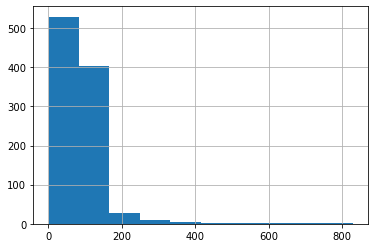

In [12]:
id_counts.date.hist()

In [13]:
date_counts = df.groupby(['date'])['id', 'page', 'cohort'].nunique()

In [14]:
date_counts.head()

,id,page,cohort
date,,,
2018-01-26,50,104,8
2018-01-27,18,86,4
2018-01-28,19,57,4
2018-01-29,61,98,8
2018-01-30,61,118,10


<AxesSubplot:>

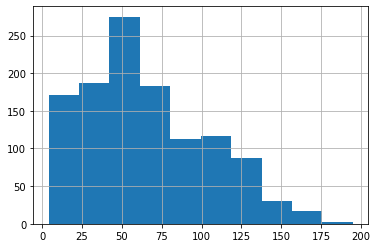

In [15]:
date_counts.id.hist()

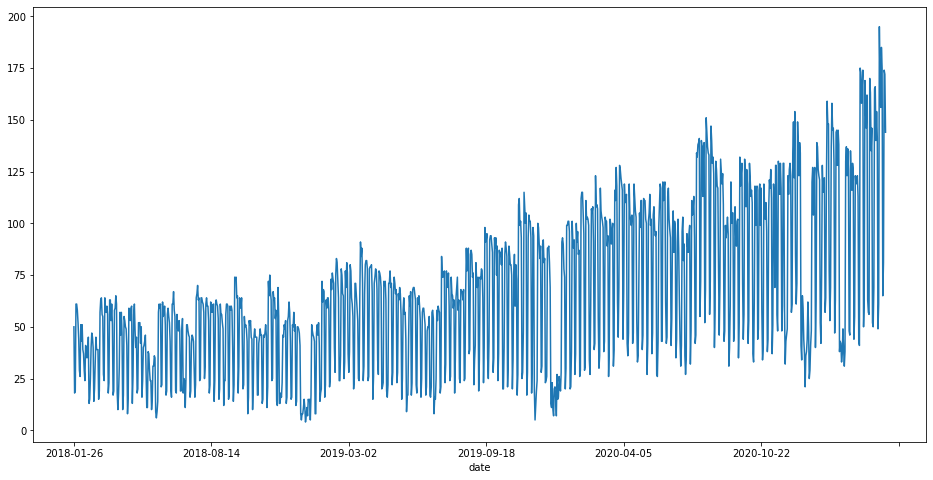

In [16]:
plt.figure(figsize=(16,8))

date_counts.id.plot()
plt.show()

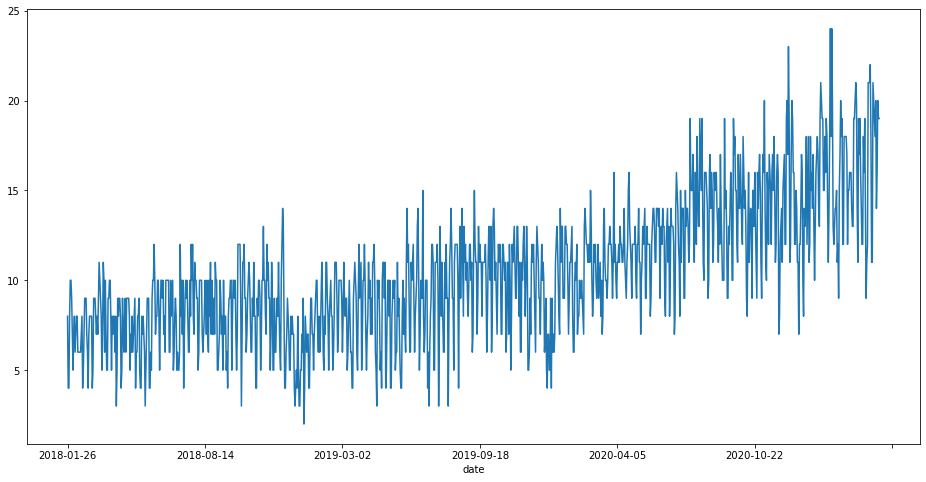

In [17]:
plt.figure(figsize=(16,8))

date_counts.cohort.plot()
plt.show()

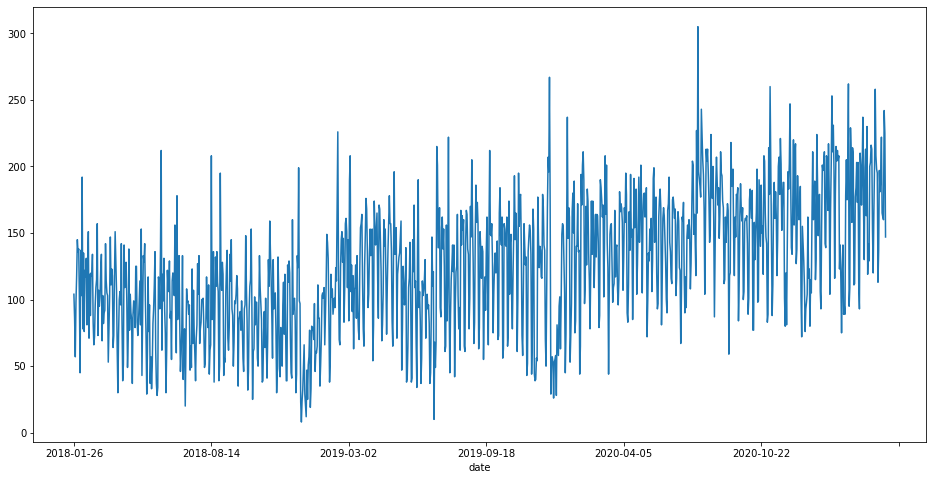

In [18]:
plt.figure(figsize=(16,8))

date_counts.page.plot()
plt.show()

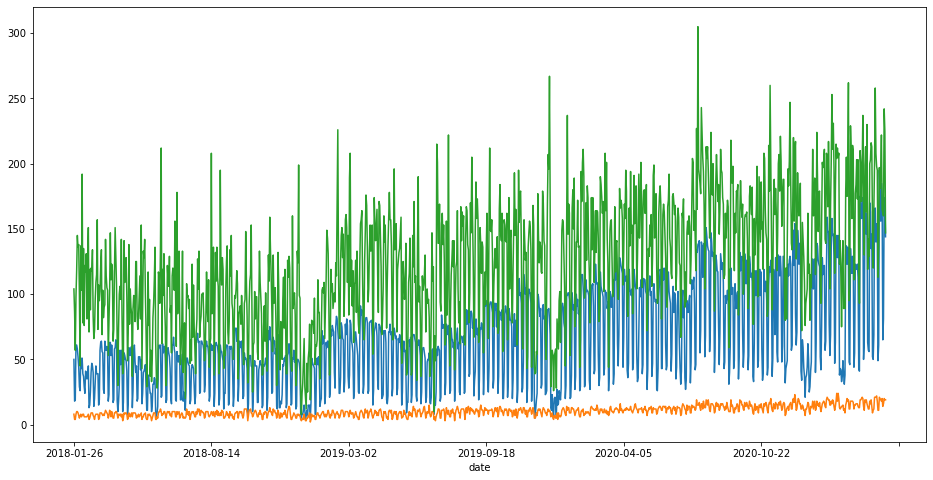

In [19]:
plt.figure(figsize=(16,8))

date_counts.id.plot()
date_counts.cohort.plot()
date_counts.page.plot()

plt.show()

In [20]:
page_counts = df.groupby(['page'])['id', 'date', 'cohort'].nunique()

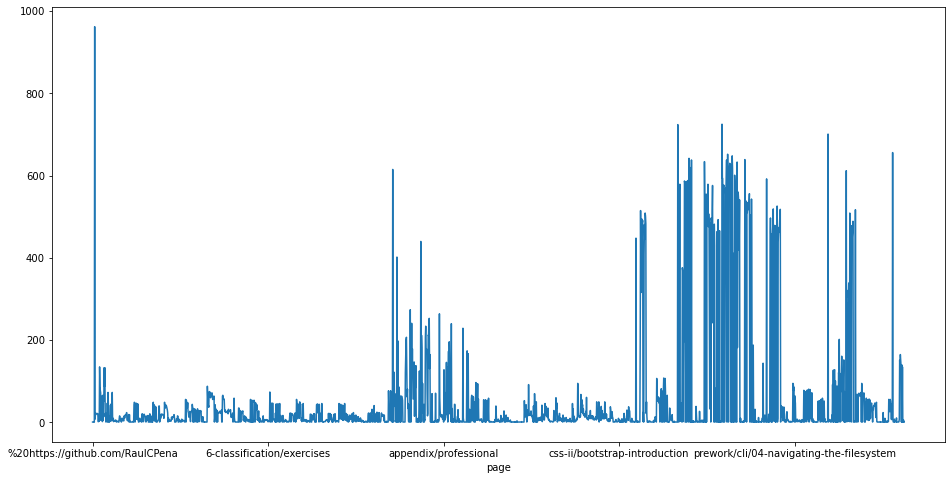

In [21]:
plt.figure(figsize=(16,8))

page_counts.id.plot()
plt.show()

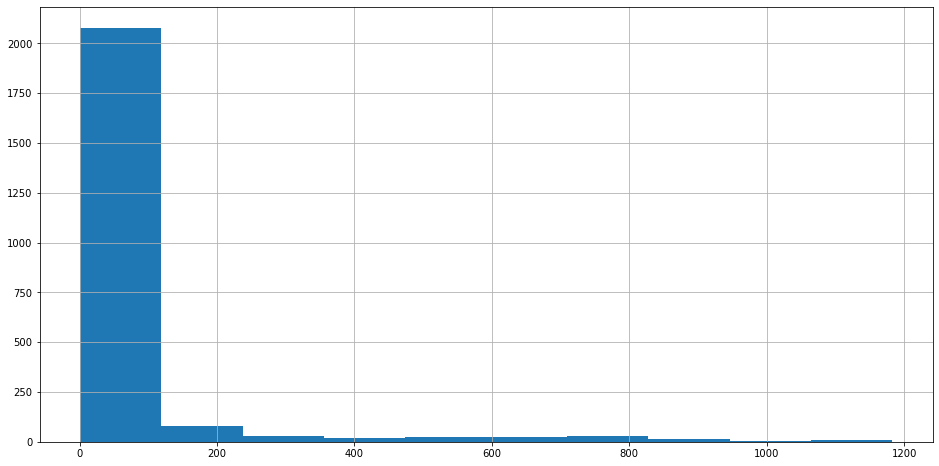

In [22]:
plt.figure(figsize=(16,8))

page_counts.date.hist()
plt.show()

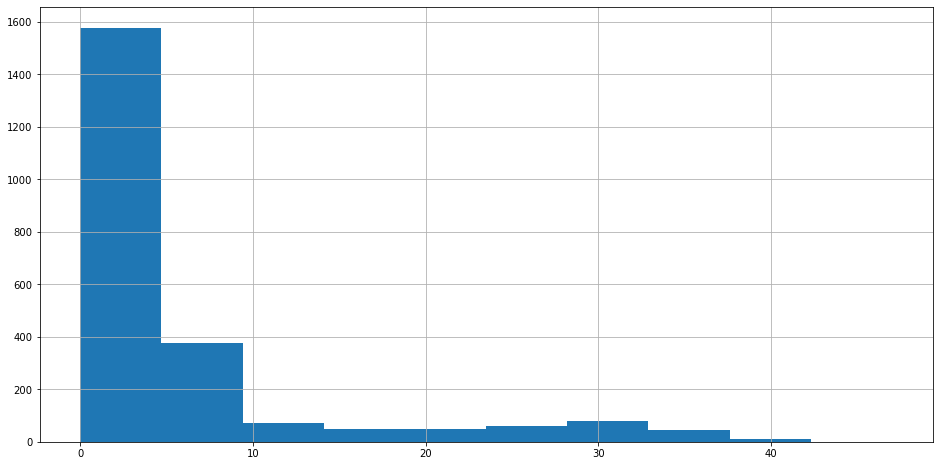

In [23]:
plt.figure(figsize=(16,8))

page_counts.cohort.hist()
plt.show()

In [24]:
page_counts

,id,date,cohort
page,,,
%20https://github.com/RaulCPena,1,1,1
',1,1,1
",%20https://github.com/RaulCPena",1,1,1
.git,1,1,1
.gitignore,2,2,2
...,...,...,...
web-dev-day-two,1,1,1
where,1,1,1
working-with-time-series-data,6,3,2


In [25]:
page_counts.id.value_counts()

1      613
2      190
3      116
4       89
6       79
      ... 
642      1
620      1
142      1
634      1
140      1
Name: id, Length: 271, dtype: int64

In [26]:
page_counts[page_counts.id == page_counts.id.max()]

,id,date,cohort
page,,,
/,962,1182,47


In [27]:
page_counts[page_counts.id == page_counts.id.max()]

,id,date,cohort
page,,,
/,962,1182,47


In [28]:
page_counts[page_counts.id > 900]

,id,date,cohort
page,,,
/,962,1182,47


In [29]:
page_counts[page_counts.id > 700]

,id,date,cohort
page,,,
/,962,1182,47
html-css,724,1120,40
javascript-i,725,1141,40
search/search_index.json,701,969,41


In [30]:
page_counts[page_counts.cohort > 35].sort_values('id', ascending=False)

,id,date,cohort
page,,,
/,962,1182,47
javascript-i,725,1141,40
html-css,724,1120,40
search/search_index.json,701,969,41
toc,656,987,40
javascript-i/functions,652,907,37
javascript-i/javascript-with-html,648,892,37
html-css/elements,642,957,36
jquery,639,1059,38


In [31]:
cohorts = gdb('curriculum_logs'
    ,'''
    SELECT * FROM cohorts
    ''')

In [32]:
cohorts

,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
0,1,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
1,2,Badlands,#badlands,2014-06-04,2014-08-22,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
2,3,Carlsbad,#carlsbad,2014-09-04,2014-11-05,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
3,4,Denali,#denali,2014-10-20,2015-01-18,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
4,5,Everglades,#everglades,2014-11-18,2015-02-24,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
5,6,Franklin,#franklin,2015-02-03,2015-05-26,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
6,7,Glacier,#glacier,2015-06-05,2015-10-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
7,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
8,9,Apollo,#apollo,2015-03-30,2015-07-29,2016-06-14 19:52:26,2016-06-14 19:52:26,None,4
9,10,Balboa,#balboa,2015-11-03,2016-03-11,2016-06-14 19:52:26,2016-06-14 19:52:26,None,4


In [33]:
cohorts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          53 non-null     int64 
 1   name        53 non-null     object
 2   slack       53 non-null     object
 3   start_date  53 non-null     object
 4   end_date    53 non-null     object
 5   created_at  53 non-null     object
 6   updated_at  53 non-null     object
 7   deleted_at  0 non-null      object
 8   program_id  53 non-null     int64 
dtypes: int64(2), object(7)
memory usage: 3.9+ KB


In [34]:
cohorts['program'] = cohorts.program_id.map({1:'Full-Stack PHP Program',
                                             2:'Full-Stack Java Program',
                                             3:'Data Science Program', 
                                             4:'Front-End Program'})

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900223 entries, 0 to 900222
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    900223 non-null  object 
 1   time    900223 non-null  object 
 2   page    900222 non-null  object 
 3   id      900223 non-null  int64  
 4   cohort  847330 non-null  float64
 5   ip      900223 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 41.2+ MB


In [36]:
full = df.copy()

In [37]:
full = full.merge(how='left', left_on='cohort', right_on='id', right= cohorts)
full

,date,time,page,id_x,cohort,ip,id_y,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id,program
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0,Full-Stack PHP Program
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0,Full-Stack PHP Program
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0,Full-Stack PHP Program
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0,Full-Stack PHP Program
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,None,2.0,Full-Stack Java Program
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900218,2021-04-21,16:41:51,jquery/personal-site,64,28.0,71.150.217.33,28.0,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,None,2.0,Full-Stack Java Program
900219,2021-04-21,16:42:02,jquery/mapbox-api,64,28.0,71.150.217.33,28.0,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,None,2.0,Full-Stack Java Program
900220,2021-04-21,16:42:09,jquery/ajax/weather-map,64,28.0,71.150.217.33,28.0,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,None,2.0,Full-Stack Java Program
900221,2021-04-21,16:44:37,anomaly-detection/discrete-probabilistic-methods,744,28.0,24.160.137.86,28.0,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,None,2.0,Full-Stack Java Program


<div class="alert alert-box alert-info">
    </div>
    
***
### 1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?

In [38]:
full[full.cohort == 1].groupby('page').agg({'date': 'count', 'name':'first'})

,date,name
page,,
/,626,Arches
0_Classification_Algorithms,1,Arches
2.0_Intro_Stats,1,Arches
5.0_Intro_Regression,2,Arches
7.0_Intro_Clustering,2,Arches
...,...,...
spring/setup,73,Arches
students,1,Arches
students/units/75/sub_units/268,1,Arches


In [39]:
full.groupby('page').agg({'date': 'count', 'name':'first'}).sort_values(by= 'date',ascending=False).head(10)

,date,name
page,,
/,50313,Hampton
search/search_index.json,19519,Hampton
javascript-i,18983,Teddy
toc,18297,Hampton
java-iii,13733,Sequoia
html-css,13635,Teddy
java-ii,12685,Hampton
spring,12524,Sequoia
jquery,11525,Teddy


In [40]:
full.groupby('page')\
.agg({'date': 'count', 'name':'first'})\
.sort_values(by= 'date',ascending=False)\
.head(10)

,date,name
page,,
/,50313,Hampton
search/search_index.json,19519,Hampton
javascript-i,18983,Teddy
toc,18297,Hampton
java-iii,13733,Sequoia
html-css,13635,Teddy
java-ii,12685,Hampton
spring,12524,Sequoia
jquery,11525,Teddy


In [41]:
full[full.cohort == 1].groupby('page')\
.agg({'date': 'count', 'name':'first'})\
.sort_values(by= 'date',ascending=False)\
.head(10)

,date,name
page,,
/,626,Arches
javascript-i,294,Arches
html-css,215,Arches
javascript-ii,204,Arches
spring,192,Arches
java-ii,167,Arches
java-iii,153,Arches
jquery,133,Arches
appendix,133,Arches


In [42]:
full[full.name == 'Denali'] 

,date,time,page,id_x,cohort,ip,id_y,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id,program
5005,2018-02-04,11:21:38,/,85,4.0,66.42.139.162,4.0,Denali,#denali,2014-10-20,2015-01-18,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0,Full-Stack PHP Program
5006,2018-02-04,11:23:27,mkdocs/search_index.json,85,4.0,66.42.139.162,4.0,Denali,#denali,2014-10-20,2015-01-18,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0,Full-Stack PHP Program
5007,2018-02-04,11:24:05,prework/databases,85,4.0,66.42.139.162,4.0,Denali,#denali,2014-10-20,2015-01-18,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0,Full-Stack PHP Program
5008,2018-02-04,11:24:56,prework/versioning/github,85,4.0,66.42.139.162,4.0,Denali,#denali,2014-10-20,2015-01-18,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0,Full-Stack PHP Program


In [43]:
for i in full.program.unique():
    each = full[full.program == i].groupby('page')\
.agg({'date': 'count', 'program':'first'})\
.sort_values(by= 'date',ascending=False)\
.head(10)
    print(each)

               date                 program
page                                       
/              1681  Full-Stack PHP Program
index.html     1011  Full-Stack PHP Program
javascript-i    736  Full-Stack PHP Program
html-css        542  Full-Stack PHP Program
spring          501  Full-Stack PHP Program
java-iii        479  Full-Stack PHP Program
java-ii         454  Full-Stack PHP Program
java-i          444  Full-Stack PHP Program
javascript-ii   429  Full-Stack PHP Program
appendix        409  Full-Stack PHP Program
                           date                  program
page                                                    
/                         35814  Full-Stack Java Program
javascript-i              17457  Full-Stack Java Program
toc                       17428  Full-Stack Java Program
search/search_index.json  15212  Full-Stack Java Program
java-iii                  12683  Full-Stack Java Program
html-css                  12569  Full-Stack Java Program
java-ii         

### Top Lessons
- Full-Stack PHP Program
  - javascript-i
- Full-Stack Java Program
  - javascript-i
- Front-End Program
  - content/html-css
- Data Science Program
  - classification/overview

In [44]:
full[full.cohort == 1].groupby('page')['name'].count().sort_values(ascending=False).head(10)

page
/                626
javascript-i     294
html-css         215
javascript-ii    204
spring           192
java-ii          167
java-iii         153
jquery           133
appendix         133
java-i           132
Name: name, dtype: int64

In [45]:
display(Markdown(full[full.cohort == 1].groupby('page')['name'].count().sort_values(ascending=False).head(10).to_markdown()))

| page          |   name |
|:--------------|-------:|
| /             |    626 |
| javascript-i  |    294 |
| html-css      |    215 |
| javascript-ii |    204 |
| spring        |    192 |
| java-ii       |    167 |
| java-iii      |    153 |
| jquery        |    133 |
| appendix      |    133 |
| java-i        |    132 |

<div class="alert alert-box alert-info">
    </div>
    
***
### 2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?

In [46]:
for i in cohorts.id.unique():
    each = full[full.cohort == i].groupby('page')\
.agg({'date': 'count', 'name':'first', 'program':'first'})\
.sort_values(by= 'date',ascending=False)\
.head(10)\
    .to_markdown()
    display(Markdown(each))

| page          |   date | name   | program                |
|:--------------|-------:|:-------|:-----------------------|
| /             |    626 | Arches | Full-Stack PHP Program |
| javascript-i  |    294 | Arches | Full-Stack PHP Program |
| html-css      |    215 | Arches | Full-Stack PHP Program |
| javascript-ii |    204 | Arches | Full-Stack PHP Program |
| spring        |    192 | Arches | Full-Stack PHP Program |
| java-ii       |    167 | Arches | Full-Stack PHP Program |
| java-iii      |    153 | Arches | Full-Stack PHP Program |
| jquery        |    133 | Arches | Full-Stack PHP Program |
| appendix      |    133 | Arches | Full-Stack PHP Program |
| java-i        |    132 | Arches | Full-Stack PHP Program |

| page                                               |   date | name     | program                |
|:---------------------------------------------------|-------:|:---------|:-----------------------|
| /                                                  |     17 | Badlands | Full-Stack PHP Program |
| content/php_ii/command-line                        |      6 | Badlands | Full-Stack PHP Program |
| content/php_i                                      |      5 | Badlands | Full-Stack PHP Program |
| content/php_ii/control-structures-i                |      5 | Badlands | Full-Stack PHP Program |
| content/php_ii/command-line/io-streams.html        |      5 | Badlands | Full-Stack PHP Program |
| content/php_ii                                     |      4 | Badlands | Full-Stack PHP Program |
| content/php_i/intro-via-interactive-shell          |      3 | Badlands | Full-Stack PHP Program |
| toc                                                |      2 | Badlands | Full-Stack PHP Program |
| content/php_i/intro-to-operators                   |      2 | Badlands | Full-Stack PHP Program |
| content/php_ii/command-line/passing-arguments.html |      2 | Badlands | Full-Stack PHP Program |

| page   | date   | name   | program   |
|--------|--------|--------|-----------|

| page                      |   date | name   | program                |
|:--------------------------|-------:|:-------|:-----------------------|
| /                         |      1 | Denali | Full-Stack PHP Program |
| mkdocs/search_index.json  |      1 | Denali | Full-Stack PHP Program |
| prework/databases         |      1 | Denali | Full-Stack PHP Program |
| prework/versioning/github |      1 | Denali | Full-Stack PHP Program |

| page   |   date | name       | program                |
|:-------|-------:|:-----------|:-----------------------|
| /      |      1 | Everglades | Full-Stack PHP Program |

| page                |   date | name     | program                |
|:--------------------|-------:|:---------|:-----------------------|
| javascript-ii/es6   |     10 | Franklin | Full-Stack PHP Program |
| /                   |      4 | Franklin | Full-Stack PHP Program |
| java-i              |      3 | Franklin | Full-Stack PHP Program |
| java-iii/user-input |      3 | Franklin | Full-Stack PHP Program |
| java-iii            |      3 | Franklin | Full-Stack PHP Program |
| java-ii             |      3 | Franklin | Full-Stack PHP Program |
| spring              |      2 | Franklin | Full-Stack PHP Program |
| mysql               |      2 | Franklin | Full-Stack PHP Program |
| jquery              |      2 | Franklin | Full-Stack PHP Program |
| javascript-ii       |      2 | Franklin | Full-Stack PHP Program |

| page                                                                      |   date | name    | program                |
|:--------------------------------------------------------------------------|-------:|:--------|:-----------------------|
| /                                                                         |     51 | Glacier | Full-Stack PHP Program |
| content/html-css                                                          |     29 | Glacier | Full-Stack PHP Program |
| javascript-i/introduction/working-with-data-types-operators-and-variables |     24 | Glacier | Full-Stack PHP Program |
| html-css                                                                  |     21 | Glacier | Full-Stack PHP Program |
| javascript-i/functions                                                    |     20 | Glacier | Full-Stack PHP Program |
| content/html-css/introduction.html                                        |     20 | Glacier | Full-Stack PHP Program |
| javascript-i/introduction/variables                                       |     19 | Glacier | Full-Stack PHP Program |
| javascript-i/introduction/operators                                       |     18 | Glacier | Full-Stack PHP Program |
| javascript-i/conditionals                                                 |     16 | Glacier | Full-Stack PHP Program |
| javascript-i/javascript-with-html                                         |     14 | Glacier | Full-Stack PHP Program |

| page              |   date | name    | program                |
|:------------------|-------:|:--------|:-----------------------|
| /                 |    210 | Hampton | Full-Stack PHP Program |
| java-iii          |     57 | Hampton | Full-Stack PHP Program |
| appendix          |     55 | Hampton | Full-Stack PHP Program |
| java-i            |     46 | Hampton | Full-Stack PHP Program |
| java-ii           |     46 | Hampton | Full-Stack PHP Program |
| spring            |     43 | Hampton | Full-Stack PHP Program |
| javascript-i      |     36 | Hampton | Full-Stack PHP Program |
| javascript-ii     |     31 | Hampton | Full-Stack PHP Program |
| java-iii/servlets |     30 | Hampton | Full-Stack PHP Program |
| mysql             |     30 | Hampton | Full-Stack PHP Program |

| page                                        |   date | name   | program           |
|:--------------------------------------------|-------:|:-------|:------------------|
| content/html-css                            |      2 | Apollo | Front-End Program |
| /                                           |      1 | Apollo | Front-End Program |
| content/html-css/gitbook/images/favicon.ico |      1 | Apollo | Front-End Program |
| content/html-css/introduction.html          |      1 | Apollo | Front-End Program |

| page   | date   | name   | program   |
|--------|--------|--------|-----------|

| page                  |   date | name   | program                |
|:----------------------|-------:|:-------|:-----------------------|
| /                     |     19 | Ike    | Full-Stack PHP Program |
| html-css              |     12 | Ike    | Full-Stack PHP Program |
| html-css/elements     |     11 | Ike    | Full-Stack PHP Program |
| html-css/introduction |     10 | Ike    | Full-Stack PHP Program |
| content/html-css      |      9 | Ike    | Full-Stack PHP Program |
| html-css/forms        |      8 | Ike    | Full-Stack PHP Program |
| javascript-i          |      7 | Ike    | Full-Stack PHP Program |
| index.html            |      6 | Ike    | Full-Stack PHP Program |
| html-css/css-i        |      6 | Ike    | Full-Stack PHP Program |
| toc                   |      6 | Ike    | Full-Stack PHP Program |

| page                                    |   date | name   | program                |
|:----------------------------------------|-------:|:-------|:-----------------------|
| content/html-css                        |     19 | Joshua | Full-Stack PHP Program |
| content/html-css/introduction.html      |     14 | Joshua | Full-Stack PHP Program |
| content/javascript                      |     12 | Joshua | Full-Stack PHP Program |
| content/mysql/intro-to-mysql            |     10 | Joshua | Full-Stack PHP Program |
| content/html-css/elements.html          |      9 | Joshua | Full-Stack PHP Program |
| /                                       |      8 | Joshua | Full-Stack PHP Program |
| index.html                              |      8 | Joshua | Full-Stack PHP Program |
| content/html-css/forms.html             |      7 | Joshua | Full-Stack PHP Program |
| content/php_iv                          |      7 | Joshua | Full-Stack PHP Program |
| content/javascript/primitive-types.html |      7 | Joshua | Full-Stack PHP Program |

| page                                             |   date | name   | program                |
|:-------------------------------------------------|-------:|:-------|:-----------------------|
| /                                                |    219 | Kings  | Full-Stack PHP Program |
| index.html                                       |     84 | Kings  | Full-Stack PHP Program |
| content/laravel/intro                            |     83 | Kings  | Full-Stack PHP Program |
| content/laravel/intro/application-structure.html |     63 | Kings  | Full-Stack PHP Program |
| content/laravel/intro/gitbook/images/favicon.ico |     56 | Kings  | Full-Stack PHP Program |
| content/php_iii                                  |     47 | Kings  | Full-Stack PHP Program |
| content/html-css                                 |     45 | Kings  | Full-Stack PHP Program |
| content/php_iv                                   |     42 | Kings  | Full-Stack PHP Program |
| content/php_ii                                   |     40 | Kings  | Full-Stack PHP Program |
| content/laravel/quickstart/db-migrations.html    |     40 | Kings  | Full-Stack PHP Program |

| page                             |   date | name   | program                |
|:---------------------------------|-------:|:-------|:-----------------------|
| index.html                       |    877 | Lassen | Full-Stack PHP Program |
| javascript-i                     |    233 | Lassen | Full-Stack PHP Program |
| java-iii                         |    224 | Lassen | Full-Stack PHP Program |
| spring                           |    222 | Lassen | Full-Stack PHP Program |
| html-css                         |    174 | Lassen | Full-Stack PHP Program |
| appendix                         |    170 | Lassen | Full-Stack PHP Program |
| java-ii                          |    160 | Lassen | Full-Stack PHP Program |
| java-i                           |    138 | Lassen | Full-Stack PHP Program |
| /                                |    125 | Lassen | Full-Stack PHP Program |
| spring/fundamentals/repositories |    115 | Lassen | Full-Stack PHP Program |

| page                                 |   date | name    | program                 |
|:-------------------------------------|-------:|:--------|:------------------------|
| /                                    |     33 | Mammoth | Full-Stack Java Program |
| java-i                               |     19 | Mammoth | Full-Stack Java Program |
| java-iii                             |     13 | Mammoth | Full-Stack Java Program |
| spring                               |     12 | Mammoth | Full-Stack Java Program |
| spring/fundamentals/controllers      |     12 | Mammoth | Full-Stack Java Program |
| spring/fundamentals/views            |     11 | Mammoth | Full-Stack Java Program |
| java-ii                              |     10 | Mammoth | Full-Stack Java Program |
| javascript-ii                        |     10 | Mammoth | Full-Stack Java Program |
| java-iii/deployment-and-dependencies |      9 | Mammoth | Full-Stack Java Program |
| java-iii/jsp-and-jstl                |      9 | Mammoth | Full-Stack Java Program |

| page          |   date | name    | program                 |
|:--------------|-------:|:--------|:------------------------|
| spring        |     65 | Niagara | Full-Stack Java Program |
| index.html    |     63 | Niagara | Full-Stack Java Program |
| /             |     37 | Niagara | Full-Stack Java Program |
| java-iii      |     29 | Niagara | Full-Stack Java Program |
| mysql         |     24 | Niagara | Full-Stack Java Program |
| javascript-i  |     23 | Niagara | Full-Stack Java Program |
| javascript-ii |     21 | Niagara | Full-Stack Java Program |
| appendix      |     20 | Niagara | Full-Stack Java Program |
| java-i        |     18 | Niagara | Full-Stack Java Program |
| java-ii       |     17 | Niagara | Full-Stack Java Program |

| page                                                                      |   date | name    | program                |
|:--------------------------------------------------------------------------|-------:|:--------|:-----------------------|
| /                                                                         |    249 | Olympic | Full-Stack PHP Program |
| javascript-i                                                              |    128 | Olympic | Full-Stack PHP Program |
| java-i                                                                    |     76 | Olympic | Full-Stack PHP Program |
| jquery                                                                    |     71 | Olympic | Full-Stack PHP Program |
| html-css                                                                  |     69 | Olympic | Full-Stack PHP Program |
| java-i/methods                                                            |     69 | Olympic | Full-Stack PHP Program |
| javascript-i/introduction/working-with-data-types-operators-and-variables |     65 | Olympic | Full-Stack PHP Program |
| javascript-i/javascript-with-html                                         |     63 | Olympic | Full-Stack PHP Program |
| javascript-i/bom-and-dom/bom                                              |     60 | Olympic | Full-Stack PHP Program |
| java-i/console-io                                                         |     60 | Olympic | Full-Stack PHP Program |

| page              |   date | name      | program                 |
|:------------------|-------:|:----------|:------------------------|
| /                 |    149 | Pinnacles | Full-Stack Java Program |
| javascript-i      |     69 | Pinnacles | Full-Stack Java Program |
| javascript-ii     |     58 | Pinnacles | Full-Stack Java Program |
| spring            |     56 | Pinnacles | Full-Stack Java Program |
| html-css          |     56 | Pinnacles | Full-Stack Java Program |
| java-i            |     54 | Pinnacles | Full-Stack Java Program |
| javascript-ii/npm |     51 | Pinnacles | Full-Stack Java Program |
| java-ii           |     50 | Pinnacles | Full-Stack Java Program |
| java-iii          |     45 | Pinnacles | Full-Stack Java Program |
| mysql             |     39 | Pinnacles | Full-Stack Java Program |

| page                                             |   date | name   | program                |
|:-------------------------------------------------|-------:|:-------|:-----------------------|
| /                                                |    151 | Quincy | Full-Stack PHP Program |
| content/laravel/intro                            |     38 | Quincy | Full-Stack PHP Program |
| content/html-css                                 |     33 | Quincy | Full-Stack PHP Program |
| content/laravel/intro/environment.html           |     31 | Quincy | Full-Stack PHP Program |
| content/laravel/intro/application-structure.html |     20 | Quincy | Full-Stack PHP Program |
| content/php_iii                                  |     19 | Quincy | Full-Stack PHP Program |
| content/mysql/intro-to-mysql                     |     19 | Quincy | Full-Stack PHP Program |
| javascript-i/conditionals                        |     16 | Quincy | Full-Stack PHP Program |
| content/php_iii/php-with-html                    |     15 | Quincy | Full-Stack PHP Program |
| content/appendix                                 |     14 | Quincy | Full-Stack PHP Program |

| page   | date   | name   | program   |
|--------|--------|--------|-----------|

| page                                   |   date | name    | program                 |
|:---------------------------------------|-------:|:--------|:------------------------|
| /                                      |    630 | Sequoia | Full-Stack Java Program |
| spring                                 |    364 | Sequoia | Full-Stack Java Program |
| spring/fundamentals/views              |    207 | Sequoia | Full-Stack Java Program |
| javascript-i                           |    202 | Sequoia | Full-Stack Java Program |
| spring/fundamentals/controllers        |    190 | Sequoia | Full-Stack Java Program |
| spring/fundamentals/repositories       |    172 | Sequoia | Full-Stack Java Program |
| appendix                               |    170 | Sequoia | Full-Stack Java Program |
| mkdocs/search_index.json               |    168 | Sequoia | Full-Stack Java Program |
| html-css                               |    168 | Sequoia | Full-Stack Java Program |
| spring/fundamentals/form-model-binding |    156 | Sequoia | Full-Stack Java Program |

| page                     |   date | name   | program                 |
|:-------------------------|-------:|:-------|:------------------------|
| /                        |   1828 | Teddy  | Full-Stack Java Program |
| spring                   |    744 | Teddy  | Full-Stack Java Program |
| java-iii                 |    732 | Teddy  | Full-Stack Java Program |
| mysql                    |    638 | Teddy  | Full-Stack Java Program |
| javascript-i             |    615 | Teddy  | Full-Stack Java Program |
| mkdocs/search_index.json |    595 | Teddy  | Full-Stack Java Program |
| java-i                   |    522 | Teddy  | Full-Stack Java Program |
| jquery                   |    512 | Teddy  | Full-Stack Java Program |
| java-ii                  |    509 | Teddy  | Full-Stack Java Program |
| appendix                 |    505 | Teddy  | Full-Stack Java Program |

| page                     |   date | name    | program                 |
|:-------------------------|-------:|:--------|:------------------------|
| /                        |   1641 | Ulysses | Full-Stack Java Program |
| mkdocs/search_index.json |    721 | Ulysses | Full-Stack Java Program |
| html-css                 |    562 | Ulysses | Full-Stack Java Program |
| javascript-i             |    526 | Ulysses | Full-Stack Java Program |
| java-ii                  |    425 | Ulysses | Full-Stack Java Program |
| java-iii                 |    412 | Ulysses | Full-Stack Java Program |
| spring                   |    409 | Ulysses | Full-Stack Java Program |
| java-i                   |    377 | Ulysses | Full-Stack Java Program |
| mysql                    |    367 | Ulysses | Full-Stack Java Program |
| jquery                   |    364 | Ulysses | Full-Stack Java Program |

| page          |   date | name      | program                 |
|:--------------|-------:|:----------|:------------------------|
| /             |   2101 | Voyageurs | Full-Stack Java Program |
| javascript-i  |    884 | Voyageurs | Full-Stack Java Program |
| java-iii      |    770 | Voyageurs | Full-Stack Java Program |
| java-ii       |    756 | Voyageurs | Full-Stack Java Program |
| mysql         |    663 | Voyageurs | Full-Stack Java Program |
| spring        |    650 | Voyageurs | Full-Stack Java Program |
| java-i        |    641 | Voyageurs | Full-Stack Java Program |
| javascript-ii |    584 | Voyageurs | Full-Stack Java Program |
| jquery        |    583 | Voyageurs | Full-Stack Java Program |
| html-css      |    528 | Voyageurs | Full-Stack Java Program |

| page                                  |   date | name     | program                 |
|:--------------------------------------|-------:|:---------|:------------------------|
| /                                     |   1132 | Wrangell | Full-Stack Java Program |
| toc                                   |    991 | Wrangell | Full-Stack Java Program |
| javascript-i                          |    560 | Wrangell | Full-Stack Java Program |
| search/search_index.json              |    504 | Wrangell | Full-Stack Java Program |
| html-css                              |    411 | Wrangell | Full-Stack Java Program |
| java-i                                |    406 | Wrangell | Full-Stack Java Program |
| jquery                                |    377 | Wrangell | Full-Stack Java Program |
| java-iii                              |    337 | Wrangell | Full-Stack Java Program |
| java-ii                               |    325 | Wrangell | Full-Stack Java Program |
| html-css/css-ii/bootstrap-grid-system |    313 | Wrangell | Full-Stack Java Program |

| page                     |   date | name   | program                 |
|:-------------------------|-------:|:-------|:------------------------|
| /                        |    924 | Xanadu | Full-Stack Java Program |
| javascript-i             |    722 | Xanadu | Full-Stack Java Program |
| html-css                 |    597 | Xanadu | Full-Stack Java Program |
| search/search_index.json |    577 | Xanadu | Full-Stack Java Program |
| jquery                   |    544 | Xanadu | Full-Stack Java Program |
| mysql                    |    509 | Xanadu | Full-Stack Java Program |
| java-ii                  |    502 | Xanadu | Full-Stack Java Program |
| java-iii                 |    497 | Xanadu | Full-Stack Java Program |
| javascript-ii            |    496 | Xanadu | Full-Stack Java Program |
| java-i                   |    484 | Xanadu | Full-Stack Java Program |

| page                            |   date | name     | program                 |
|:--------------------------------|-------:|:---------|:------------------------|
| /                               |    981 | Yosemite | Full-Stack Java Program |
| toc                             |    697 | Yosemite | Full-Stack Java Program |
| javascript-i                    |    452 | Yosemite | Full-Stack Java Program |
| html-css                        |    384 | Yosemite | Full-Stack Java Program |
| spring                          |    381 | Yosemite | Full-Stack Java Program |
| search/search_index.json        |    361 | Yosemite | Full-Stack Java Program |
| java-iii                        |    351 | Yosemite | Full-Stack Java Program |
| javascript-ii                   |    337 | Yosemite | Full-Stack Java Program |
| mysql                           |    331 | Yosemite | Full-Stack Java Program |
| javascript-ii/map-filter-reduce |    299 | Yosemite | Full-Stack Java Program |

| page                     |   date | name   | program                 |
|:-------------------------|-------:|:-------|:------------------------|
| /                        |   6340 | Staff  | Full-Stack Java Program |
| javascript-i             |   1817 | Staff  | Full-Stack Java Program |
| spring                   |   1403 | Staff  | Full-Stack Java Program |
| java-iii                 |   1393 | Staff  | Full-Stack Java Program |
| search/search_index.json |   1349 | Staff  | Full-Stack Java Program |
| appendix                 |   1288 | Staff  | Full-Stack Java Program |
| html-css                 |   1284 | Staff  | Full-Stack Java Program |
| java-ii                  |   1260 | Staff  | Full-Stack Java Program |
| jquery/ajax/weather-map  |   1050 | Staff  | Full-Stack Java Program |
| javascript-ii            |    993 | Staff  | Full-Stack Java Program |

| page                     |   date | name   | program                 |
|:-------------------------|-------:|:-------|:------------------------|
| /                        |   1798 | Zion   | Full-Stack Java Program |
| toc                      |   1465 | Zion   | Full-Stack Java Program |
| javascript-i             |    897 | Zion   | Full-Stack Java Program |
| java-iii                 |    753 | Zion   | Full-Stack Java Program |
| search/search_index.json |    700 | Zion   | Full-Stack Java Program |
| html-css                 |    675 | Zion   | Full-Stack Java Program |
| spring                   |    672 | Zion   | Full-Stack Java Program |
| javascript-ii            |    647 | Zion   | Full-Stack Java Program |
| java-ii                  |    624 | Zion   | Full-Stack Java Program |
| java-i                   |    605 | Zion   | Full-Stack Java Program |

| page   | date   | name   | program   |
|--------|--------|--------|-----------|

| page         |   date | name      | program                 |
|:-------------|-------:|:----------|:------------------------|
| /            |   1174 | Andromeda | Full-Stack Java Program |
| toc          |    638 | Andromeda | Full-Stack Java Program |
| javascript-i |    516 | Andromeda | Full-Stack Java Program |
| spring       |    487 | Andromeda | Full-Stack Java Program |
| java-iii     |    433 | Andromeda | Full-Stack Java Program |
| java-ii      |    398 | Andromeda | Full-Stack Java Program |
| html-css     |    375 | Andromeda | Full-Stack Java Program |
| mysql        |    355 | Andromeda | Full-Stack Java Program |
| java-i       |    338 | Andromeda | Full-Stack Java Program |
| jquery       |    338 | Andromeda | Full-Stack Java Program |

| page                     |   date | name       | program                 |
|:-------------------------|-------:|:-----------|:------------------------|
| /                        |    955 | Betelgeuse | Full-Stack Java Program |
| search/search_index.json |    761 | Betelgeuse | Full-Stack Java Program |
| javascript-i             |    717 | Betelgeuse | Full-Stack Java Program |
| toc                      |    610 | Betelgeuse | Full-Stack Java Program |
| jquery                   |    542 | Betelgeuse | Full-Stack Java Program |
| html-css/elements        |    495 | Betelgeuse | Full-Stack Java Program |
| java-i                   |    482 | Betelgeuse | Full-Stack Java Program |
| java-ii                  |    481 | Betelgeuse | Full-Stack Java Program |
| java-iii                 |    472 | Betelgeuse | Full-Stack Java Program |
| html-css                 |    457 | Betelgeuse | Full-Stack Java Program |

| page                     |   date | name   | program                 |
|:-------------------------|-------:|:-------|:------------------------|
| /                        |   1653 | Ceres  | Full-Stack Java Program |
| search/search_index.json |   1380 | Ceres  | Full-Stack Java Program |
| javascript-i             |   1003 | Ceres  | Full-Stack Java Program |
| toc                      |    911 | Ceres  | Full-Stack Java Program |
| html-css                 |    766 | Ceres  | Full-Stack Java Program |
| java-iii                 |    682 | Ceres  | Full-Stack Java Program |
| java-ii                  |    681 | Ceres  | Full-Stack Java Program |
| jquery                   |    637 | Ceres  | Full-Stack Java Program |
| mysql                    |    622 | Ceres  | Full-Stack Java Program |
| spring                   |    562 | Ceres  | Full-Stack Java Program |

| page                                              |   date | name   | program              |
|:--------------------------------------------------|-------:|:-------|:---------------------|
| /                                                 |   1967 | Bayes  | Data Science Program |
| 1-fundamentals/modern-data-scientist.jpg          |    650 | Bayes  | Data Science Program |
| 1-fundamentals/AI-ML-DL-timeline.jpg              |    648 | Bayes  | Data Science Program |
| 1-fundamentals/1.1-intro-to-data-science          |    640 | Bayes  | Data Science Program |
| search/search_index.json                          |    588 | Bayes  | Data Science Program |
| 6-regression/1-overview                           |    521 | Bayes  | Data Science Program |
| 10-anomaly-detection/AnomalyDetectionCartoon.jpeg |    387 | Bayes  | Data Science Program |
| 10-anomaly-detection/1-overview                   |    384 | Bayes  | Data Science Program |
| 6-regression/5.0-evaluate                         |    333 | Bayes  | Data Science Program |
| 5-stats/3-probability-distributions               |    320 | Bayes  | Data Science Program |

| page                     |   date | name   | program                 |
|:-------------------------|-------:|:-------|:------------------------|
| /                        |   1467 | Deimos | Full-Stack Java Program |
| javascript-i             |    896 | Deimos | Full-Stack Java Program |
| html-css                 |    773 | Deimos | Full-Stack Java Program |
| toc                      |    750 | Deimos | Full-Stack Java Program |
| search/search_index.json |    746 | Deimos | Full-Stack Java Program |
| jquery                   |    563 | Deimos | Full-Stack Java Program |
| spring                   |    533 | Deimos | Full-Stack Java Program |
| java-iii                 |    523 | Deimos | Full-Stack Java Program |
| mysql                    |    517 | Deimos | Full-Stack Java Program |
| java-ii                  |    511 | Deimos | Full-Stack Java Program |

| page                     |   date | name   | program                 |
|:-------------------------|-------:|:-------|:------------------------|
| /                        |   1295 | Europa | Full-Stack Java Program |
| toc                      |    964 | Europa | Full-Stack Java Program |
| search/search_index.json |    742 | Europa | Full-Stack Java Program |
| javascript-i             |    506 | Europa | Full-Stack Java Program |
| java-iii                 |    451 | Europa | Full-Stack Java Program |
| html-css/elements        |    430 | Europa | Full-Stack Java Program |
| java-ii                  |    375 | Europa | Full-Stack Java Program |
| mysql                    |    372 | Europa | Full-Stack Java Program |
| jquery                   |    370 | Europa | Full-Stack Java Program |
| html-css                 |    353 | Europa | Full-Stack Java Program |

| page                     |   date | name    | program                 |
|:-------------------------|-------:|:--------|:------------------------|
| /                        |   2038 | Fortuna | Full-Stack Java Program |
| toc                      |   1293 | Fortuna | Full-Stack Java Program |
| search/search_index.json |   1020 | Fortuna | Full-Stack Java Program |
| java-iii                 |    786 | Fortuna | Full-Stack Java Program |
| javascript-i             |    785 | Fortuna | Full-Stack Java Program |
| java-ii                  |    657 | Fortuna | Full-Stack Java Program |
| spring                   |    636 | Fortuna | Full-Stack Java Program |
| mysql                    |    591 | Fortuna | Full-Stack Java Program |
| html-css                 |    585 | Fortuna | Full-Stack Java Program |
| java-i                   |    555 | Fortuna | Full-Stack Java Program |

| page                                              |   date | name   | program              |
|:--------------------------------------------------|-------:|:-------|:---------------------|
| /                                                 |   1712 | Curie  | Data Science Program |
| 6-regression/1-overview                           |    595 | Curie  | Data Science Program |
| search/search_index.json                          |    538 | Curie  | Data Science Program |
| 1-fundamentals/modern-data-scientist.jpg          |    467 | Curie  | Data Science Program |
| 1-fundamentals/AI-ML-DL-timeline.jpg              |    465 | Curie  | Data Science Program |
| 1-fundamentals/1.1-intro-to-data-science          |    461 | Curie  | Data Science Program |
| 3-sql/1-mysql-overview                            |    441 | Curie  | Data Science Program |
| 10-anomaly-detection/AnomalyDetectionCartoon.jpeg |    345 | Curie  | Data Science Program |
| 10-anomaly-detection/1-overview                   |    345 | Curie  | Data Science Program |
| 4-python/8.4.3-dataframes                         |    260 | Curie  | Data Science Program |

| page                     |   date | name   | program                 |
|:-------------------------|-------:|:-------|:------------------------|
| search/search_index.json |   1497 | Apex   | Full-Stack Java Program |
| /                        |   1346 | Apex   | Full-Stack Java Program |
| toc                      |    810 | Apex   | Full-Stack Java Program |
| html-css                 |    738 | Apex   | Full-Stack Java Program |
| javascript-i             |    669 | Apex   | Full-Stack Java Program |
| java-ii                  |    666 | Apex   | Full-Stack Java Program |
| java-iii                 |    663 | Apex   | Full-Stack Java Program |
| spring                   |    600 | Apex   | Full-Stack Java Program |
| java-i                   |    590 | Apex   | Full-Stack Java Program |
| mysql                    |    483 | Apex   | Full-Stack Java Program |

| page                     |   date | name     | program                 |
|:-------------------------|-------:|:---------|:------------------------|
| /                        |   1727 | Ganymede | Full-Stack Java Program |
| search/search_index.json |   1095 | Ganymede | Full-Stack Java Program |
| toc                      |    822 | Ganymede | Full-Stack Java Program |
| javascript-i             |    760 | Ganymede | Full-Stack Java Program |
| java-iii                 |    651 | Ganymede | Full-Stack Java Program |
| java-ii                  |    641 | Ganymede | Full-Stack Java Program |
| appendix                 |    561 | Ganymede | Full-Stack Java Program |
| jquery                   |    536 | Ganymede | Full-Stack Java Program |
| javascript-ii            |    525 | Ganymede | Full-Stack Java Program |
| java-i                   |    515 | Ganymede | Full-Stack Java Program |

| page                     |   date | name     | program                 |
|:-------------------------|-------:|:---------|:------------------------|
| /                        |   1365 | Hyperion | Full-Stack Java Program |
| toc                      |   1022 | Hyperion | Full-Stack Java Program |
| javascript-i             |    910 | Hyperion | Full-Stack Java Program |
| java-iii                 |    701 | Hyperion | Full-Stack Java Program |
| java-ii                  |    688 | Hyperion | Full-Stack Java Program |
| search/search_index.json |    670 | Hyperion | Full-Stack Java Program |
| mysql                    |    553 | Hyperion | Full-Stack Java Program |
| spring                   |    526 | Hyperion | Full-Stack Java Program |
| jquery                   |    497 | Hyperion | Full-Stack Java Program |
| java-i                   |    489 | Hyperion | Full-Stack Java Program |

| page                                           |   date | name   | program              |
|:-----------------------------------------------|-------:|:-------|:---------------------|
| /                                              |   2980 | Darden | Data Science Program |
| classification/overview                        |   1109 | Darden | Data Science Program |
| classification/scale_features_or_not.svg       |    943 | Darden | Data Science Program |
| sql/mysql-overview                             |    774 | Darden | Data Science Program |
| search/search_index.json                       |    664 | Darden | Data Science Program |
| anomaly-detection/AnomalyDetectionCartoon.jpeg |    612 | Darden | Data Science Program |
| anomaly-detection/overview                     |    592 | Darden | Data Science Program |
| 1-fundamentals/AI-ML-DL-timeline.jpg           |    470 | Darden | Data Science Program |
| 1-fundamentals/modern-data-scientist.jpg       |    470 | Darden | Data Science Program |
| 1-fundamentals/1.1-intro-to-data-science       |    460 | Darden | Data Science Program |

| page   | date   | name   | program   |
|--------|--------|--------|-----------|

| page                      |   date | name   | program                 |
|:--------------------------|-------:|:-------|:------------------------|
| /                         |    772 | Bash   | Full-Stack Java Program |
| search/search_index.json  |    660 | Bash   | Full-Stack Java Program |
| toc                       |    404 | Bash   | Full-Stack Java Program |
| javascript-i              |    374 | Bash   | Full-Stack Java Program |
| java-iii                  |    324 | Bash   | Full-Stack Java Program |
| spring                    |    311 | Bash   | Full-Stack Java Program |
| java-ii                   |    268 | Bash   | Full-Stack Java Program |
| html-css                  |    265 | Bash   | Full-Stack Java Program |
| jquery                    |    262 | Bash   | Full-Stack Java Program |
| javascript-i/introduction |    256 | Bash   | Full-Stack Java Program |

| page                     |   date | name    | program                 |
|:-------------------------|-------:|:--------|:------------------------|
| toc                      |   1866 | Jupiter | Full-Stack Java Program |
| /                        |   1696 | Jupiter | Full-Stack Java Program |
| search/search_index.json |    998 | Jupiter | Full-Stack Java Program |
| javascript-i             |    926 | Jupiter | Full-Stack Java Program |
| java-iii                 |    795 | Jupiter | Full-Stack Java Program |
| html-css                 |    784 | Jupiter | Full-Stack Java Program |
| java-ii                  |    755 | Jupiter | Full-Stack Java Program |
| spring                   |    621 | Jupiter | Full-Stack Java Program |
| mysql                    |    564 | Jupiter | Full-Stack Java Program |
| java-i                   |    503 | Jupiter | Full-Stack Java Program |

| page                     |   date | name    | program                 |
|:-------------------------|-------:|:--------|:------------------------|
| /                        |    939 | Kalypso | Full-Stack Java Program |
| javascript-i             |    631 | Kalypso | Full-Stack Java Program |
| toc                      |    495 | Kalypso | Full-Stack Java Program |
| html-css                 |    495 | Kalypso | Full-Stack Java Program |
| jquery                   |    470 | Kalypso | Full-Stack Java Program |
| search/search_index.json |    467 | Kalypso | Full-Stack Java Program |
| java-iii                 |    456 | Kalypso | Full-Stack Java Program |
| javascript-ii            |    440 | Kalypso | Full-Stack Java Program |
| java-ii                  |    417 | Kalypso | Full-Stack Java Program |
| java-i                   |    408 | Kalypso | Full-Stack Java Program |

| page                                                          |   date | name   | program              |
|:--------------------------------------------------------------|-------:|:-------|:---------------------|
| /                                                             |   1115 | Easley | Data Science Program |
| classification/scale_features_or_not.svg                      |    463 | Easley | Data Science Program |
| classification/overview                                       |    445 | Easley | Data Science Program |
| classification/classical_programming_vs_machine_learning.jpeg |    432 | Easley | Data Science Program |
| fundamentals/AI-ML-DL-timeline.jpg                            |    381 | Easley | Data Science Program |
| fundamentals/modern-data-scientist.jpg                        |    379 | Easley | Data Science Program |
| fundamentals/intro-to-data-science                            |    372 | Easley | Data Science Program |
| sql/mysql-overview                                            |    295 | Easley | Data Science Program |
| search/search_index.json                                      |    251 | Easley | Data Science Program |
| regression/model                                              |    204 | Easley | Data Science Program |

| page                                                                      |   date | name   | program                 |
|:--------------------------------------------------------------------------|-------:|:-------|:------------------------|
| javascript-i                                                              |    676 | Luna   | Full-Stack Java Program |
| /                                                                         |    491 | Luna   | Full-Stack Java Program |
| search/search_index.json                                                  |    405 | Luna   | Full-Stack Java Program |
| toc                                                                       |    373 | Luna   | Full-Stack Java Program |
| javascript-i/introduction/working-with-data-types-operators-and-variables |    315 | Luna   | Full-Stack Java Program |
| html-css                                                                  |    307 | Luna   | Full-Stack Java Program |
| jquery                                                                    |    301 | Luna   | Full-Stack Java Program |
| java-iii                                                                  |    259 | Luna   | Full-Stack Java Program |
| java-ii                                                                   |    255 | Luna   | Full-Stack Java Program |
| javascript-ii                                                             |    247 | Luna   | Full-Stack Java Program |

| page                                                                      |   date | name   | program                 |
|:--------------------------------------------------------------------------|-------:|:-------|:------------------------|
| toc                                                                       |    910 | Marco  | Full-Stack Java Program |
| javascript-i                                                              |    907 | Marco  | Full-Stack Java Program |
| /                                                                         |    699 | Marco  | Full-Stack Java Program |
| javascript-i/introduction/working-with-data-types-operators-and-variables |    505 | Marco  | Full-Stack Java Program |
| html-css                                                                  |    479 | Marco  | Full-Stack Java Program |
| javascript-i/javascript-with-html                                         |    411 | Marco  | Full-Stack Java Program |
| jquery                                                                    |    405 | Marco  | Full-Stack Java Program |
| javascript-i/functions                                                    |    382 | Marco  | Full-Stack Java Program |
| javascript-i/loops                                                        |    312 | Marco  | Full-Stack Java Program |
| javascript-i/conditionals                                                 |    292 | Marco  | Full-Stack Java Program |

| page   | date   | name   | program   |
|--------|--------|--------|-----------|

| page                                   |   date | name     | program              |
|:---------------------------------------|-------:|:---------|:---------------------|
| fundamentals/modern-data-scientist.jpg |    627 | Florence | Data Science Program |
| fundamentals/AI-ML-DL-timeline.jpg     |    624 | Florence | Data Science Program |
| fundamentals/intro-to-data-science     |    615 | Florence | Data Science Program |
| /                                      |    584 | Florence | Data Science Program |
| python/data-types-and-variables        |    258 | Florence | Data Science Program |
| fundamentals/DataToAction_v2.jpg       |    208 | Florence | Data Science Program |
| sql/mysql-overview                     |    203 | Florence | Data Science Program |
| fundamentals/data-science-pipeline     |    189 | Florence | Data Science Program |
| sql/joins                              |    186 | Florence | Data Science Program |
| sql/functions                          |    166 | Florence | Data Science Program |

| page                                                                      |   date | name    | program                 |
|:--------------------------------------------------------------------------|-------:|:--------|:------------------------|
| /                                                                         |    472 | Neptune | Full-Stack Java Program |
| toc                                                                       |    451 | Neptune | Full-Stack Java Program |
| javascript-i/introduction/working-with-data-types-operators-and-variables |    329 | Neptune | Full-Stack Java Program |
| html-css                                                                  |    313 | Neptune | Full-Stack Java Program |
| javascript-i/javascript-with-html                                         |    311 | Neptune | Full-Stack Java Program |
| javascript-i                                                              |    272 | Neptune | Full-Stack Java Program |
| html-css/css-ii/bootstrap-grid-system                                     |    256 | Neptune | Full-Stack Java Program |
| html-css/css-ii/bootstrap-introduction                                    |    227 | Neptune | Full-Stack Java Program |
| javascript-i/loops                                                        |    226 | Neptune | Full-Stack Java Program |
| javascript-i/functions                                                    |    217 | Neptune | Full-Stack Java Program |

| page                                                                      |   date | name   | program                 |
|:--------------------------------------------------------------------------|-------:|:-------|:------------------------|
| javascript-i/introduction/operators                                       |    179 | Oberon | Full-Stack Java Program |
| javascript-i/introduction/primitive-types                                 |    177 | Oberon | Full-Stack Java Program |
| javascript-i/functions                                                    |    171 | Oberon | Full-Stack Java Program |
| javascript-i/introduction/working-with-data-types-operators-and-variables |    146 | Oberon | Full-Stack Java Program |
| javascript-i/conditionals                                                 |    144 | Oberon | Full-Stack Java Program |
| javascript-i                                                              |    136 | Oberon | Full-Stack Java Program |
| /                                                                         |    131 | Oberon | Full-Stack Java Program |
| javascript-i/javascript-with-html                                         |    125 | Oberon | Full-Stack Java Program |
| toc                                                                       |    101 | Oberon | Full-Stack Java Program |
| javascript-i/introduction/variables                                       |     95 | Oberon | Full-Stack Java Program |

In [47]:
nobodys = full[full.name.isnull()].copy()
nobodys

,date,time,page,id_x,cohort,ip,id_y,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id,program
411,2018-01-26,16:46:16,/,48,NaN,97.105.19.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
412,2018-01-26,16:46:24,spring/extra-features/form-validation,48,NaN,97.105.19.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
425,2018-01-26,17:54:24,/,48,NaN,97.105.19.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435,2018-01-26,18:32:03,/,48,NaN,97.105.19.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
436,2018-01-26,18:32:17,mysql/relationships/joins,48,NaN,97.105.19.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899897,2021-04-21,12:49:00,javascript-ii,717,NaN,136.50.102.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
899898,2021-04-21,12:49:02,javascript-ii/es6,717,NaN,136.50.102.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
899899,2021-04-21,12:51:27,javascript-ii/map-filter-reduce,717,NaN,136.50.102.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
899900,2021-04-21,12:52:37,javascript-ii/promises,717,NaN,136.50.102.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
staff = full[full.name == 'Staff'].copy()
staff

,date,time,page,id_x,cohort,ip,id_y,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id,program
166284,2018-12-06,14:15:29,appendix/further-reading/java/intellij-tomcat-...,53,28.0,97.105.19.58,28.0,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,None,2.0,Full-Stack Java Program
166294,2018-12-06,14:25:40,javascript-i,314,28.0,97.105.19.58,28.0,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,None,2.0,Full-Stack Java Program
166295,2018-12-06,14:25:41,javascript-i/coffee-project,314,28.0,97.105.19.58,28.0,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,None,2.0,Full-Stack Java Program
166521,2018-12-06,15:31:29,spring,40,28.0,170.248.173.247,28.0,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,None,2.0,Full-Stack Java Program
166522,2018-12-06,15:31:33,spring/fundamentals/security,40,28.0,170.248.173.247,28.0,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,None,2.0,Full-Stack Java Program
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900218,2021-04-21,16:41:51,jquery/personal-site,64,28.0,71.150.217.33,28.0,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,None,2.0,Full-Stack Java Program
900219,2021-04-21,16:42:02,jquery/mapbox-api,64,28.0,71.150.217.33,28.0,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,None,2.0,Full-Stack Java Program
900220,2021-04-21,16:42:09,jquery/ajax/weather-map,64,28.0,71.150.217.33,28.0,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,None,2.0,Full-Stack Java Program
900221,2021-04-21,16:44:37,anomaly-detection/discrete-probabilistic-methods,744,28.0,24.160.137.86,28.0,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,None,2.0,Full-Stack Java Program


In [49]:
students = full[(full.name != 'Staff') & (full.name.isnull() == False)].copy()
students

,date,time,page,id_x,cohort,ip,id_y,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id,program
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0,Full-Stack PHP Program
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0,Full-Stack PHP Program
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0,Full-Stack PHP Program
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0,Full-Stack PHP Program
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,None,2.0,Full-Stack Java Program
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900210,2021-04-21,16:36:09,jquery/personal-site,869,135.0,136.50.98.51,135.0,Marco,#marco,2021-01-25,2021-07-19,2021-01-20 21:31:11,2021-01-20 21:31:11,None,2.0,Full-Stack Java Program
900211,2021-04-21,16:36:34,html-css/css-ii/bootstrap-grid-system,948,138.0,104.48.214.211,138.0,Neptune,#neptune,2021-03-15,2021-09-03,2021-03-15 19:57:09,2021-03-15 19:57:09,None,2.0,Full-Stack Java Program
900212,2021-04-21,16:37:48,java-iii,834,134.0,67.11.50.23,134.0,Luna,#luna,2020-12-07,2021-06-08,2020-12-07 16:58:43,2020-12-07 16:58:43,None,2.0,Full-Stack Java Program
900213,2021-04-21,16:38:14,java-iii/servlets,834,134.0,67.11.50.23,134.0,Luna,#luna,2020-12-07,2021-06-08,2020-12-07 16:58:43,2020-12-07 16:58:43,None,2.0,Full-Stack Java Program


In [50]:
students.name.value_counts(dropna=False)

Ceres         40730
Zion          38096
Jupiter       37109
Fortuna       36902
Voyageurs     35636
Ganymede      33844
Apex          33568
Deimos        32888
Darden        32015
Teddy         30926
Hyperion      29855
Betelgeuse    29356
Ulysses       28534
Europa        28033
Xanadu        27749
Bayes         26538
Wrangell      25586
Andromeda     25359
Kalypso       23691
Curie         21582
Yosemite      20743
Bash          17713
Luna          16623
Marco         16397
Easley        14715
Lassen         9587
Arches         8890
Florence       8562
Sequoia        7444
Neptune        7276
Olympic        4954
Kings          2845
Pinnacles      2158
Hampton        1712
Oberon         1672
Quincy         1237
Niagara         755
Mammoth         691
Glacier         598
Joshua          302
Ike             253
Badlands         93
Franklin         72
Apollo            5
Denali            4
Everglades        1
Name: name, dtype: int64

In [51]:
for i in students.program.unique():
    each = students[students.program == i].groupby('page')\
.agg({'date': 'count', 'program':'first', 'name':pd.Series.mode})\
.sort_values(by= 'date',ascending=False)\
.head(10)
    print(each)

               date                 program    name
page                                               
/              1681  Full-Stack PHP Program  Arches
index.html     1011  Full-Stack PHP Program  Lassen
javascript-i    736  Full-Stack PHP Program  Arches
html-css        542  Full-Stack PHP Program  Arches
spring          501  Full-Stack PHP Program  Lassen
java-iii        479  Full-Stack PHP Program  Lassen
java-ii         454  Full-Stack PHP Program  Arches
java-i          444  Full-Stack PHP Program  Lassen
javascript-ii   429  Full-Stack PHP Program  Arches
appendix        409  Full-Stack PHP Program  Lassen
                           date                  program       name
page                                                               
/                         29474  Full-Stack Java Program  Voyageurs
toc                       16517  Full-Stack Java Program    Jupiter
javascript-i              15640  Full-Stack Java Program      Ceres
search/search_index.json  13863  Ful

In [52]:
students.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 763299 entries, 0 to 900217
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   date        763299 non-null  object 
 1   time        763299 non-null  object 
 2   page        763298 non-null  object 
 3   id_x        763299 non-null  int64  
 4   cohort      763299 non-null  float64
 5   ip          763299 non-null  object 
 6   id_y        763299 non-null  float64
 7   name        763299 non-null  object 
 8   slack       763299 non-null  object 
 9   start_date  763299 non-null  object 
 10  end_date    763299 non-null  object 
 11  created_at  763299 non-null  object 
 12  updated_at  763299 non-null  object 
 13  deleted_at  0 non-null       object 
 14  program_id  763299 non-null  float64
 15  program     763299 non-null  object 
dtypes: float64(3), int64(1), object(12)
memory usage: 99.0+ MB


In [53]:
students_ts = students.copy()

In [54]:
students_ts.start_date = pd.to_datetime(students_ts.start_date)

In [55]:
students_ts.end_date = pd.to_datetime(students_ts.end_date)

In [56]:
students_ts.date = pd.to_datetime(students_ts['date'] + ' ' +students_ts['time'])

In [57]:
students_ts = students_ts.drop(columns='time')

In [58]:
students_ts = students_ts.set_index('date')

In [59]:
students_ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 763299 entries, 2018-01-26 09:55:03 to 2021-04-21 16:41:51
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   page        763298 non-null  object        
 1   id_x        763299 non-null  int64         
 2   cohort      763299 non-null  float64       
 3   ip          763299 non-null  object        
 4   id_y        763299 non-null  float64       
 5   name        763299 non-null  object        
 6   slack       763299 non-null  object        
 7   start_date  763299 non-null  datetime64[ns]
 8   end_date    763299 non-null  datetime64[ns]
 9   created_at  763299 non-null  object        
 10  updated_at  763299 non-null  object        
 11  deleted_at  0 non-null       object        
 12  program_id  763299 non-null  float64       
 13  program     763299 non-null  object        
dtypes: datetime64[ns](2), float64(3), int64(1), object(8)
memory usage

In [60]:
students_ts.columns.to_list()

['page',
 'id_x',
 'cohort',
 'ip',
 'id_y',
 'name',
 'slack',
 'start_date',
 'end_date',
 'created_at',
 'updated_at',
 'deleted_at',
 'program_id',
 'program']

In [61]:
students_ts[['page',
 'ip',
 'name',
 'start_date',
 'end_date',
 'program']]

,page,ip,name,start_date,end_date,program
date,,,,,,
2018-01-26 09:55:03,/,97.105.19.61,Hampton,2015-09-22,2016-02-06,Full-Stack PHP Program
2018-01-26 09:56:02,java-ii,97.105.19.61,Hampton,2015-09-22,2016-02-06,Full-Stack PHP Program
2018-01-26 09:56:05,java-ii/object-oriented-programming,97.105.19.61,Hampton,2015-09-22,2016-02-06,Full-Stack PHP Program
2018-01-26 09:56:06,slides/object_oriented_programming,97.105.19.61,Hampton,2015-09-22,2016-02-06,Full-Stack PHP Program
2018-01-26 09:56:24,javascript-i/conditionals,97.105.19.61,Teddy,2018-01-08,2018-05-17,Full-Stack Java Program
...,...,...,...,...,...,...
2021-04-21 16:36:09,jquery/personal-site,136.50.98.51,Marco,2021-01-25,2021-07-19,Full-Stack Java Program
2021-04-21 16:36:34,html-css/css-ii/bootstrap-grid-system,104.48.214.211,Neptune,2021-03-15,2021-09-03,Full-Stack Java Program
2021-04-21 16:37:48,java-iii,67.11.50.23,Luna,2020-12-07,2021-06-08,Full-Stack Java Program


In [62]:
full_students_ts = students_ts.copy()

In [63]:
students_ts = students_ts[['page',
 'ip',
 'name',
 'start_date',
 'end_date',
 'program']]

In [64]:
students_ts[students_ts.page == 'java-ii'].groupby('name').agg({'name':'count'})

,name
name,
Andromeda,398
Apex,666
Arches,167
Bash,268
Bayes,4
Betelgeuse,481
Ceres,681
Deimos,511
Europa,375


In [65]:
students_ts = students_ts[students_ts.page != '/']

In [66]:
cohort_pages = students_ts.groupby('name')\
.agg({'name':'count', 
      'page':pd.Series.mode, 
      'program':'first',
      'start_date':'first'})
cohort_pages.columns = ['visits', 'popular', 'program', 'start_date']
cohort_pages

,visits,popular,program,start_date
name,,,,
Andromeda,24185,toc,Full-Stack Java Program,2019-03-18
Apex,32222,search/search_index.json,Full-Stack Java Program,2020-02-24
Apollo,4,content/html-css,Front-End Program,2015-03-30
Arches,8264,javascript-i,Full-Stack PHP Program,2014-02-04
Badlands,76,content/php_ii/command-line,Full-Stack PHP Program,2014-06-04
Bash,16941,search/search_index.json,Full-Stack Java Program,2020-07-20
Bayes,24571,1-fundamentals/modern-data-scientist.jpg,Data Science Program,2019-08-19
Betelgeuse,28401,search/search_index.json,Full-Stack Java Program,2019-05-28
Ceres,39077,search/search_index.json,Full-Stack Java Program,2019-07-15


In [67]:
cohort_pages.sort_values('visits').head(10)

,visits,popular,program,start_date
name,,,,
Denali,3,"[mkdocs/search_index.json, prework/databases, ...",Full-Stack PHP Program,2014-10-20
Apollo,4,content/html-css,Front-End Program,2015-03-30
Franklin,68,javascript-ii/es6,Full-Stack PHP Program,2015-02-03
Badlands,76,content/php_ii/command-line,Full-Stack PHP Program,2014-06-04
Ike,234,html-css,Full-Stack PHP Program,2016-01-20
Joshua,294,content/html-css,Full-Stack PHP Program,2016-03-08
Glacier,547,content/html-css,Full-Stack PHP Program,2015-06-05
Mammoth,658,java-i,Full-Stack Java Program,2016-09-26
Niagara,718,spring,Full-Stack Java Program,2016-10-26


In [68]:
cohort_pages.groupby('program')['popular', 'visits'].agg({'popular':pd.Series.mode, 'visits':'max'})

,popular,visits
program,,
Data Science Program,"[1-fundamentals/modern-data-scientist.jpg, 6-r...",29035
Front-End Program,content/html-css,4
Full-Stack Java Program,toc,39077
Full-Stack PHP Program,"[content/html-css, index.html, javascript-i]",9462


In [69]:
cohort_pages.groupby('program')['popular'].agg(pd.Series.mode)

program
Data Science Program       [1-fundamentals/modern-data-scientist.jpg, 6-r...
Front-End Program                                           content/html-css
Full-Stack Java Program                                                  toc
Full-Stack PHP Program          [content/html-css, index.html, javascript-i]
Name: popular, dtype: object

In [70]:
cohort_pages.popular.value_counts()

toc                                                                         10
javascript-i                                                                 8
search/search_index.json                                                     5
content/html-css                                                             3
spring                                                                       3
index.html                                                                   2
java-iii                                                                     1
content/laravel/intro                                                        1
javascript-i/introduction/operators                                          1
java-i                                                                       1
html-css                                                                     1
fundamentals/modern-data-scientist.jpg                                       1
javascript-ii/es6                                   

In [71]:
cohort_pages[cohort_pages.visits <= 100]

,visits,popular,program,start_date
name,,,,
Apollo,4,content/html-css,Front-End Program,2015-03-30
Badlands,76,content/php_ii/command-line,Full-Stack PHP Program,2014-06-04
Denali,3,"[mkdocs/search_index.json, prework/databases, ...",Full-Stack PHP Program,2014-10-20
Franklin,68,javascript-ii/es6,Full-Stack PHP Program,2015-02-03


In [72]:
cohort_pages[cohort_pages.program == 'Front-End Program']

,visits,popular,program,start_date
name,,,,
Apollo,4,content/html-css,Front-End Program,2015-03-30


In [73]:
cohort_pages

,visits,popular,program,start_date
name,,,,
Andromeda,24185,toc,Full-Stack Java Program,2019-03-18
Apex,32222,search/search_index.json,Full-Stack Java Program,2020-02-24
Apollo,4,content/html-css,Front-End Program,2015-03-30
Arches,8264,javascript-i,Full-Stack PHP Program,2014-02-04
Badlands,76,content/php_ii/command-line,Full-Stack PHP Program,2014-06-04
Bash,16941,search/search_index.json,Full-Stack Java Program,2020-07-20
Bayes,24571,1-fundamentals/modern-data-scientist.jpg,Data Science Program,2019-08-19
Betelgeuse,28401,search/search_index.json,Full-Stack Java Program,2019-05-28
Ceres,39077,search/search_index.json,Full-Stack Java Program,2019-07-15


In [76]:
# cohort_pages[cohort_pages['popular'] == 'toc']

<div class="alert alert-box alert-info">
    </div>
    
***
### 3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?

<div class="alert alert-box alert-info">
    </div>
    
***
### 4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?

In [77]:
nohort

,date,time,page,id,cohort,ip
411,2018-01-26,16:46:16,/,48,NaN,97.105.19.61
412,2018-01-26,16:46:24,spring/extra-features/form-validation,48,NaN,97.105.19.61
425,2018-01-26,17:54:24,/,48,NaN,97.105.19.61
435,2018-01-26,18:32:03,/,48,NaN,97.105.19.61
436,2018-01-26,18:32:17,mysql/relationships/joins,48,NaN,97.105.19.61
...,...,...,...,...,...,...
899897,2021-04-21,12:49:00,javascript-ii,717,NaN,136.50.102.126
899898,2021-04-21,12:49:02,javascript-ii/es6,717,NaN,136.50.102.126
899899,2021-04-21,12:51:27,javascript-ii/map-filter-reduce,717,NaN,136.50.102.126
899900,2021-04-21,12:52:37,javascript-ii/promises,717,NaN,136.50.102.126


In [78]:
nohort.groupby('ip')['page', 'id'].agg({'page':pd.Series.mode, 'id':'count'})

,page,id
ip,,
103.208.220.130,/,1
103.208.220.131,/,1
103.208.220.132,/,1
103.208.220.133,/,1
103.208.220.137,/,1
...,...,...
99.203.90.1,"[6-classification/6.4-knn, appendix/interview_...",2
99.203.91.49,"[/, 3.0-mysql-overview, 3.1-mysql-introduction]",3
99.57.17.35,/,32


In [79]:
nohort.groupby('page')['ip', 'id'].agg({'ip':pd.Series.mode, 'id':'count'})

,ip,id
page,,
/,97.105.19.58,4459
00_,97.105.19.58,8
00_index,97.105.19.58,20
01_intro,97.105.19.58,44
02_listing_files,97.105.19.58,39
...,...,...
web-design/ui/color,108.208.56.254,10
web-design/ui/typography,"[108.208.56.254, 70.94.165.107]",12
web-design/ui/visuals,"[136.50.22.105, 24.243.64.3]",7


In [80]:
id_nohort = nohort.groupby('id')['ip', 'page'].agg({'ip':'nunique', 'page':'count'})

In [81]:
id_nohort.sort_values('ip', ascending=False).head(10)

,ip,page
id,,
111,29,753
369,19,448
736,17,2358
429,17,471
88,16,334
368,14,2085
355,14,1436
353,14,1398
716,14,2136


In [82]:
id_nohort.sort_values('ip', ascending=True).head(10)

,ip,page
id,,
176,1,3
663,1,4
247,1,66
782,1,370
62,1,4
356,1,21
544,1,55
74,1,80
137,1,10


In [83]:
id_nohort.sort_values('page', ascending=False).head(10)

,ip,page
id,,
354,12,2965
736,17,2358
363,7,2248
716,14,2136
368,14,2085
723,3,1692
349,9,1663
720,12,1646
48,6,1581


In [84]:
nohort[nohort.id == 354]

,date,time,page,id,cohort,ip
190851,2019-02-04,16:44:49,/,354,NaN,97.105.19.58
190888,2019-02-04,17:04:26,/,354,NaN,97.105.19.58
191134,2019-02-05,08:46:32,/,354,NaN,97.105.19.58
191206,2019-02-05,09:20:34,3.0-mysql-overview,354,NaN,97.105.19.58
191207,2019-02-05,09:20:51,1._Fundamentals,354,NaN,97.105.19.58
...,...,...,...,...,...,...
705563,2020-10-20,10:46:16,python/imports,354,NaN,173.172.170.236
705567,2020-10-20,10:47:10,python/overview,354,NaN,173.172.170.236
705569,2020-10-20,10:47:15,python/introduction-to-python,354,NaN,173.172.170.236
705571,2020-10-20,10:47:23,python/data-types-and-variables,354,NaN,173.172.170.236


In [85]:
nohort[nohort.id == 354].ip.value_counts()

97.105.19.58       2065
45.23.250.16        741
192.171.117.210      81
173.172.170.236      24
70.114.4.43          23
23.116.219.97        19
97.77.169.2           5
107.77.218.198        3
107.77.219.34         1
68.201.199.176        1
107.77.218.225        1
192.67.54.12          1
Name: ip, dtype: int64

In [86]:
df[df.ip == '97.105.19.58']

,date,time,page,id,cohort,ip
86014,2018-07-16,07:51:57,javascript-ii/promises,211,1.0,97.105.19.58
86015,2018-07-16,07:58:03,javascript-ii/map-filter-reduce,211,1.0,97.105.19.58
86016,2018-07-16,07:59:50,javascript-ii/promises,211,1.0,97.105.19.58
86017,2018-07-16,08:07:37,index.html,53,14.0,97.105.19.58
86018,2018-07-16,08:07:41,javascript-ii,53,14.0,97.105.19.58
...,...,...,...,...,...,...
491216,2020-03-23,15:10:09,toc,625,57.0,97.105.19.58
491218,2020-03-23,15:10:18,toc,623,57.0,97.105.19.58
491221,2020-03-23,15:20:39,/,627,57.0,97.105.19.58
491226,2020-03-23,15:24:54,/,628,57.0,97.105.19.58


In [87]:
df[df.ip == '45.23.250.16']

,date,time,page,id,cohort,ip
193233,2019-02-06,22:47:06,Pipeline_Demo,354,NaN,45.23.250.16
194445,2019-02-08,22:17:37,2.00.04_PrepareData_Excel,354,NaN,45.23.250.16
194848,2019-02-10,08:30:47,/,354,NaN,45.23.250.16
194849,2019-02-10,08:30:57,2.00.02_Navigating_Excel,354,NaN,45.23.250.16
194850,2019-02-10,08:33:26,2.00.03_Import_Excel,354,NaN,45.23.250.16
...,...,...,...,...,...,...
464007,2020-02-23,13:13:07,/,354,NaN,45.23.250.16
464009,2020-02-23,13:19:51,search/search_index.json,354,NaN,45.23.250.16
464010,2020-02-23,13:20:13,appendix/ds-environment-setup,354,NaN,45.23.250.16
508398,2020-04-09,18:23:37,/,354,NaN,45.23.250.16


<div class="alert alert-box alert-info">
    </div>
    
***
### 5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?

<div class="alert alert-box alert-info">
    </div>
    
***
### 6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?

In [88]:
cohort_pages

,visits,popular,program,start_date
name,,,,
Andromeda,24185,toc,Full-Stack Java Program,2019-03-18
Apex,32222,search/search_index.json,Full-Stack Java Program,2020-02-24
Apollo,4,content/html-css,Front-End Program,2015-03-30
Arches,8264,javascript-i,Full-Stack PHP Program,2014-02-04
Badlands,76,content/php_ii/command-line,Full-Stack PHP Program,2014-06-04
Bash,16941,search/search_index.json,Full-Stack Java Program,2020-07-20
Bayes,24571,1-fundamentals/modern-data-scientist.jpg,Data Science Program,2019-08-19
Betelgeuse,28401,search/search_index.json,Full-Stack Java Program,2019-05-28
Ceres,39077,search/search_index.json,Full-Stack Java Program,2019-07-15


In [89]:
full.columns.to_list()

['date',
 'time',
 'page',
 'id_x',
 'cohort',
 'ip',
 'id_y',
 'name',
 'slack',
 'start_date',
 'end_date',
 'created_at',
 'updated_at',
 'deleted_at',
 'program_id',
 'program']

In [90]:
full_students_ts

,page,id_x,cohort,ip,id_y,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id,program
date,,,,,,,,,,,,,,
2018-01-26 09:55:03,/,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0,Full-Stack PHP Program
2018-01-26 09:56:02,java-ii,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0,Full-Stack PHP Program
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0,Full-Stack PHP Program
2018-01-26 09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0,Full-Stack PHP Program
2018-01-26 09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,None,2.0,Full-Stack Java Program
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-21 16:36:09,jquery/personal-site,869,135.0,136.50.98.51,135.0,Marco,#marco,2021-01-25,2021-07-19,2021-01-20 21:31:11,2021-01-20 21:31:11,None,2.0,Full-Stack Java Program
2021-04-21 16:36:34,html-css/css-ii/bootstrap-grid-system,948,138.0,104.48.214.211,138.0,Neptune,#neptune,2021-03-15,2021-09-03,2021-03-15 19:57:09,2021-03-15 19:57:09,None,2.0,Full-Stack Java Program
2021-04-21 16:37:48,java-iii,834,134.0,67.11.50.23,134.0,Luna,#luna,2020-12-07,2021-06-08,2020-12-07 16:58:43,2020-12-07 16:58:43,None,2.0,Full-Stack Java Program


In [91]:
grad_topics = full_students_ts[['page',
 'id_x',
 'ip',
 'name',
 'start_date',
 'end_date',
 'program']].copy()

In [92]:
grad_topics[grad_topics.end_date < grad_topics.index]

,page,id_x,ip,name,start_date,end_date,program
date,,,,,,,
2018-01-26 09:55:03,/,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,Full-Stack PHP Program
2018-01-26 09:56:02,java-ii,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,Full-Stack PHP Program
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,Full-Stack PHP Program
2018-01-26 09:56:06,slides/object_oriented_programming,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,Full-Stack PHP Program
2018-01-26 10:14:47,/,11,97.105.19.61,Arches,2014-02-04,2014-04-22,Full-Stack PHP Program
...,...,...,...,...,...,...,...
2021-04-21 15:20:12,classification/classical_programming_vs_machin...,692,96.8.130.134,Darden,2020-07-13,2021-01-12,Data Science Program
2021-04-21 15:20:12,classification/scale_features_or_not.svg,692,96.8.130.134,Darden,2020-07-13,2021-01-12,Data Science Program
2021-04-21 15:20:14,classification/project,692,96.8.130.134,Darden,2020-07-13,2021-01-12,Data Science Program


In [115]:
grad_topics[grad_topics.end_date < grad_topics.index].name.value_counts(dropna=False)

Lassen        9587
Arches        8890
Deimos        8089
Teddy         5646
Sequoia       5266
Xanadu        5241
Ceres         4964
Olympic       4954
Apex          4927
Bayes         4725
Ulysses       4446
Ganymede      4406
Zion          4254
Andromeda     4245
Curie         3638
Fortuna       3505
Betelgeuse    3420
Voyageurs     3299
Darden        3181
Kings         2845
Europa        2331
Pinnacles     2158
Hampton       1712
Wrangell      1527
Yosemite      1488
Hyperion      1342
Bash          1342
Quincy        1237
Niagara        755
Mammoth        691
Jupiter        662
Glacier        598
Joshua         302
Ike            253
Badlands        93
Franklin        72
Apollo           5
Denali           4
Everglades       1
Name: name, dtype: int64

In [99]:
pd.DataFrame(grad_topics[(grad_topics['name'] == 'Lassen') & (grad_topics.end_date < grad_topics.index)].id_x.value_counts())

,id_x
53,8197
80,555
90,269
139,204
647,125
98,91
69,67
147,37
149,30
82,5


In [100]:
grad_dict = pd.DataFrame(columns=['cohort', 'after_grad'])

In [101]:
grad_dict

,cohort,after_grad


In [114]:
for i in grad_topics.name.unique():
   print(f'{i}', pd.DataFrame(grad_topics[(grad_topics['name'] == i) & (grad_topics.end_date < grad_topics.index)].id_x.value_counts()))

Hampton      id_x
1    1617
646    41
150    23
114    18
174    13
Teddy      id_x
20   1720
142   757
254   448
138   360
18    359
155   342
180   249
12    239
284   181
31    164
43    149
7     137
99    134
6      97
5      80
29     52
459    48
3      48
19     42
154    19
13     15
35      4
14      2
Sequoia      id_x
41   1152
153   760
10    717
110   510
27    328
38    224
36    178
175   178
52    159
28    124
57    120
56    118
15    117
255   114
22     85
33     72
346    60
47     58
16     58
17     41
65     34
286    29
42     24
115     6
Arches      id_x
64   3767
11   2735
211  1065
60    517
313   270
312   116
148    86
398    77
146    63
248    48
170    45
257    34
209    17
402    17
316    14
95      9
141     9
212     1
Niagara      id_x
40    513
21    107
322    63
181    39
143    26
216     4
97      2
165     1
Pinnacles      id_x
217   594
26    474
179   259
67    241
162   207
83    187
76     93
611    33
178    22
91     15
108    12
84 

In [113]:
grad_dict[grad_dict.cohort == 'Lassen'].after_grad

8         id_x
53   8197
80    555
90    269
139   ...
Name: after_grad, dtype: object

In [117]:
no_grad_access = ['Kalypso',
'Luna',
'Easley',
'Marco',
'Neptune',
'Florence',
'Oberon']

In [119]:
for i in no_grad_access:
    print(i, grad_topics[grad_topics.name == i].program.value_counts())

Kalypso Full-Stack Java Program    23691
Name: program, dtype: int64
Luna Full-Stack Java Program    16623
Name: program, dtype: int64
Easley Data Science Program    14715
Name: program, dtype: int64
Marco Full-Stack Java Program    16397
Name: program, dtype: int64
Neptune Full-Stack Java Program    7276
Name: program, dtype: int64
Florence Data Science Program    8562
Name: program, dtype: int64
Oberon Full-Stack Java Program    1672
Name: program, dtype: int64


In [122]:
for i in no_grad_access:
    print(i, grad_topics.end_date[grad_topics.name == i])

Kalypso date
2020-11-03 09:06:55   2021-05-04
2020-11-03 09:07:00   2021-05-04
2020-11-03 09:07:05   2021-05-04
2020-11-03 09:07:06   2021-05-04
2020-11-03 09:07:15   2021-05-04
                         ...    
2021-04-21 15:25:19   2021-05-04
2021-04-21 15:25:23   2021-05-04
2021-04-21 15:25:26   2021-05-04
2021-04-21 16:32:33   2021-05-04
2021-04-21 16:32:36   2021-05-04
Name: end_date, Length: 23691, dtype: datetime64[ns]
Luna date
2020-12-07 14:15:16   2021-06-08
2020-12-07 14:15:17   2021-06-08
2020-12-07 14:15:18   2021-06-08
2020-12-07 14:15:19   2021-06-08
2020-12-07 14:15:21   2021-06-08
                         ...    
2021-04-21 16:12:46   2021-06-08
2021-04-21 16:12:47   2021-06-08
2021-04-21 16:17:08   2021-06-08
2021-04-21 16:37:48   2021-06-08
2021-04-21 16:38:14   2021-06-08
Name: end_date, Length: 16623, dtype: datetime64[ns]
Easley date
2020-12-08 10:49:37   2021-06-08
2020-12-08 10:49:39   2021-06-08
2020-12-08 10:49:40   2021-06-08
2020-12-08 10:49:52   2021-06-08
2

In [272]:
grad_topics[grad_topics.end_date < grad_topics.index].name.value_counts().sum()

116101

In [273]:
grad_topics[grad_topics.end_date > grad_topics.index].name.value_counts().sum()

647198

In [274]:
grad_topics[grad_topics.end_date > grad_topics.index].name.value_counts().sum()/\
grad_topics[grad_topics.end_date < grad_topics.index].name.value_counts().sum()

5.574439496645162

In [277]:
1/(grad_topics[grad_topics.end_date > grad_topics.index].name.value_counts().sum()/\
grad_topics[grad_topics.end_date < grad_topics.index].name.value_counts().sum())

0.17939023297352588

In [278]:
1/(grad_topics[grad_topics.end_date > grad_topics.index].name.value_counts().sum()/\
(grad_topics[grad_topics.end_date < grad_topics.index].name.value_counts().sum())\
+grad_topics[grad_topics.end_date > grad_topics.index].name.value_counts().sum())

1.545108895398235e-06

In [280]:
grad_topics[grad_topics.end_date > grad_topics.index].name.value_counts().sum()/\
(grad_topics[grad_topics.end_date < grad_topics.index].name.value_counts().sum()\
+grad_topics[grad_topics.end_date > grad_topics.index].name.value_counts().sum())

0.8478957787184315

In [281]:
grad_topics[grad_topics.end_date < grad_topics.index].name.value_counts().sum()/\
(grad_topics[grad_topics.end_date < grad_topics.index].name.value_counts().sum()\
+grad_topics[grad_topics.end_date > grad_topics.index].name.value_counts().sum())

0.15210422128156856

In [129]:
grad_topics[grad_topics.id_x == 53]

,page,id_x,ip,name,start_date,end_date,program
date,,,,,,,
2018-01-28 18:48:19,index.html,53,67.10.161.55,Lassen,2016-07-18,2016-11-10,Full-Stack PHP Program
2018-01-28 18:48:24,html-css,53,67.10.161.55,Lassen,2016-07-18,2016-11-10,Full-Stack PHP Program
2018-01-28 18:49:20,javascript-i,53,67.10.161.55,Lassen,2016-07-18,2016-11-10,Full-Stack PHP Program
2018-01-28 18:49:23,javascript-i/conditionals,53,67.10.161.55,Lassen,2016-07-18,2016-11-10,Full-Stack PHP Program
2018-01-28 18:50:41,javascript-i/conditionals,53,67.10.161.55,Lassen,2016-07-18,2016-11-10,Full-Stack PHP Program
...,...,...,...,...,...,...,...
2020-01-22 13:33:12,spring/fundamentals/form-model-binding,53,97.105.19.58,Lassen,2016-07-18,2016-11-10,Full-Stack PHP Program
2020-01-23 09:47:35,index.html,53,97.105.19.58,Lassen,2016-07-18,2016-11-10,Full-Stack PHP Program
2020-01-23 09:47:41,java-ii,53,97.105.19.58,Lassen,2016-07-18,2016-11-10,Full-Stack PHP Program


In [130]:
grad_topics[grad_topics.id_x == 53].resample('D').agg({'page':pd.Series.mode, 'id_x': 'count'})

,page,id_x
date,,
2018-01-28,javascript-i/conditionals,7
2018-01-29,"[index.html, javascript-i, javascript-i/arrays...",11
2018-01-30,"[index.html, javascript-i, javascript-i/loops,...",21
2018-01-31,"[javascript-i, javascript-i/arrays/manipulating]",38
2018-02-01,"[index.html, javascript-i, javascript-i/bom-an...",39
...,...,...
2020-01-19,[],0
2020-01-20,[],0
2020-01-21,"[appendix, index.html, spring, spring/extra-fe...",4


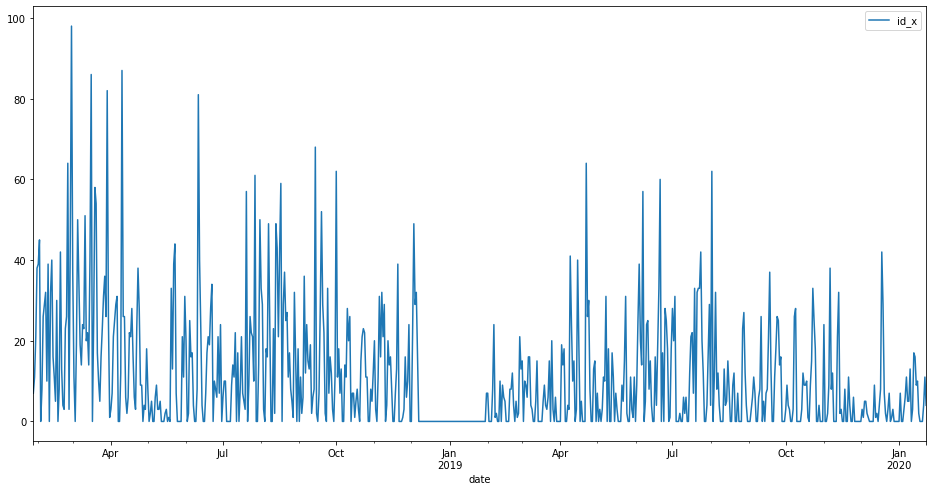

In [146]:
plt.rcParams["figure.figsize"] = (16, 8)

grad_topics[(grad_topics.id_x == 53) & (grad_topics.index > grad_topics.end_date)].resample('D').agg({'page':pd.Series.mode, 'id_x': 'count'}).plot()

plt.show()

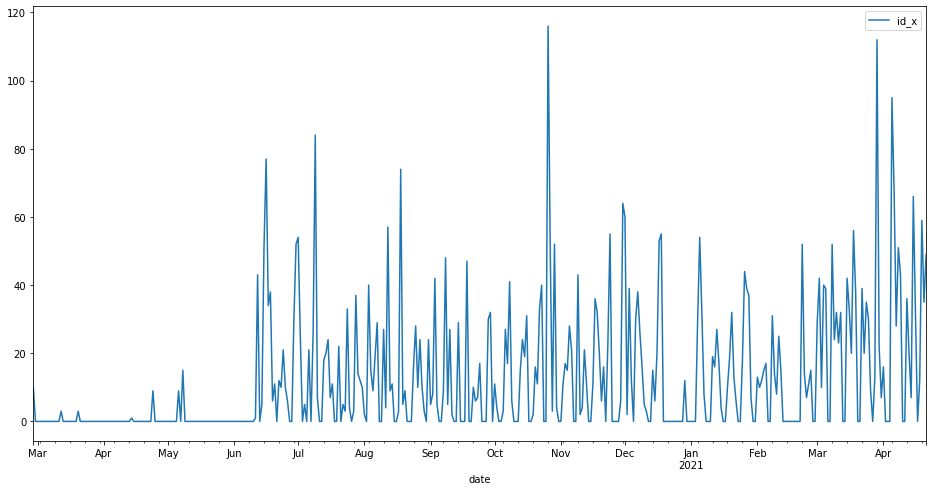

In [147]:
grad_topics[(grad_topics.id_x == 495)  & (grad_topics.index > grad_topics.end_date)].resample('D').agg({'page':pd.Series.mode, 'id_x': 'count'}).plot()

plt.show()

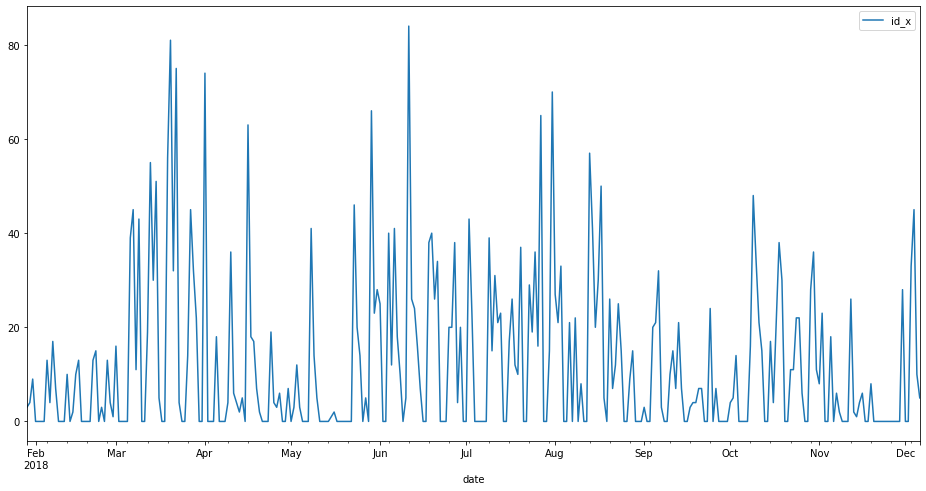

In [148]:
grad_topics\
[(grad_topics.id_x == 64) & \
 (grad_topics.index > grad_topics.end_date)]\
.resample('D')\
.agg({'page':pd.Series.mode, 
      'id_x': 'count'})\
.plot()

plt.show()

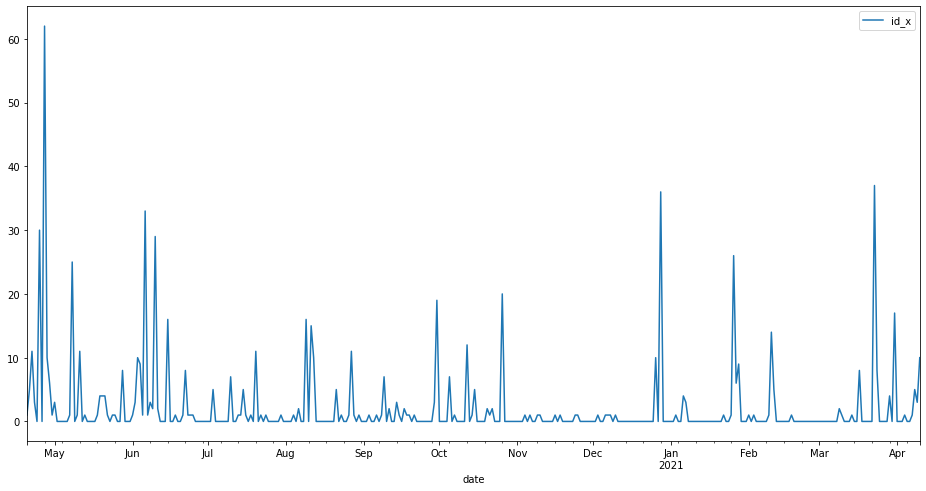

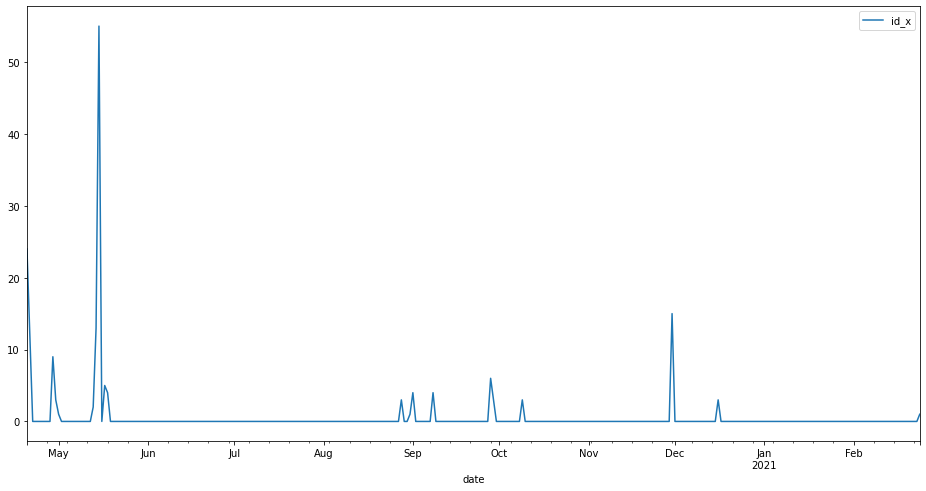

In [149]:
grad_topics[(grad_topics.id_x == 524) & \
 (grad_topics.index > grad_topics.end_date)].resample('D').agg({'page':pd.Series.mode, 'id_x': 'count'}).plot()
grad_topics[(grad_topics.id_x == 521) & \
 (grad_topics.index > grad_topics.end_date)].resample('D').agg({'page':pd.Series.mode, 'id_x': 'count'}).plot()

plt.show()

In [154]:
grad_topics.program.unique()

array(['Full-Stack PHP Program', 'Full-Stack Java Program',
       'Front-End Program', 'Data Science Program'], dtype=object)

In [155]:
programs = ['Full-Stack PHP Program', 'Full-Stack Java Program',
       'Front-End Program', 'Data Science Program']

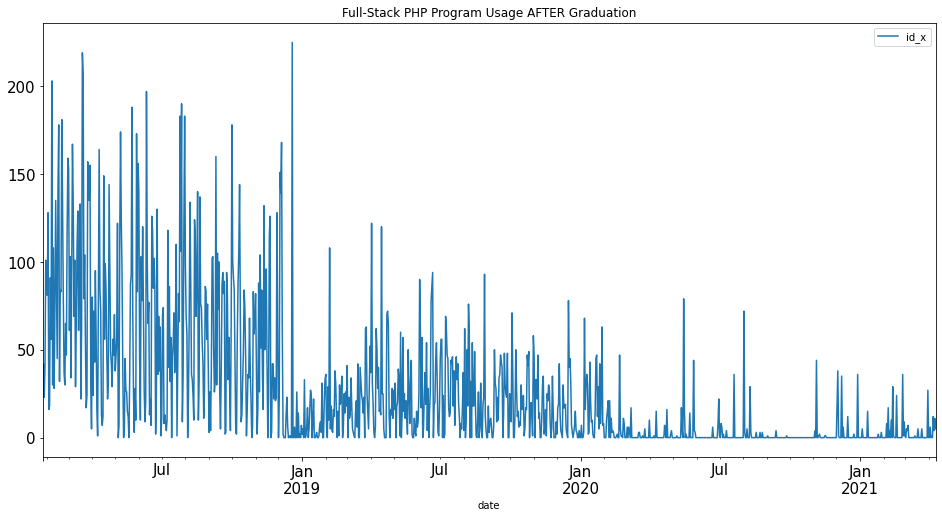

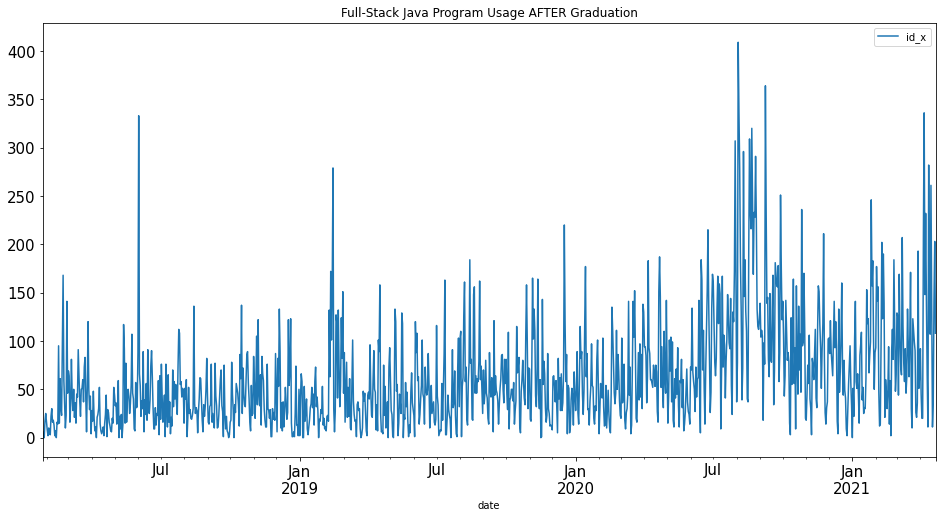

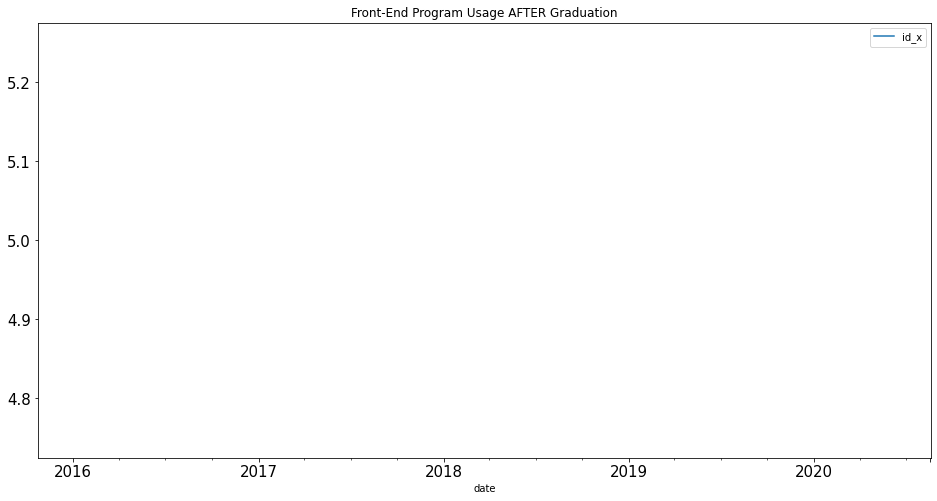

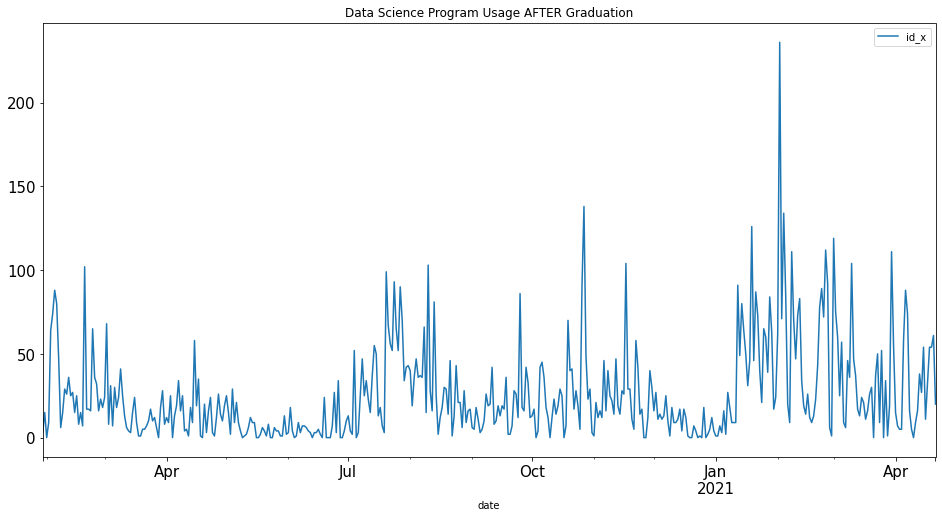

In [163]:
for i in programs:
    grad_topics[(grad_topics.program == i) & \
 (grad_topics.index > grad_topics.end_date)].resample('D').agg({'id_x': 'count'}).plot(title=f'{i} Usage AFTER Graduation', fontsize= 15)

plt.show()

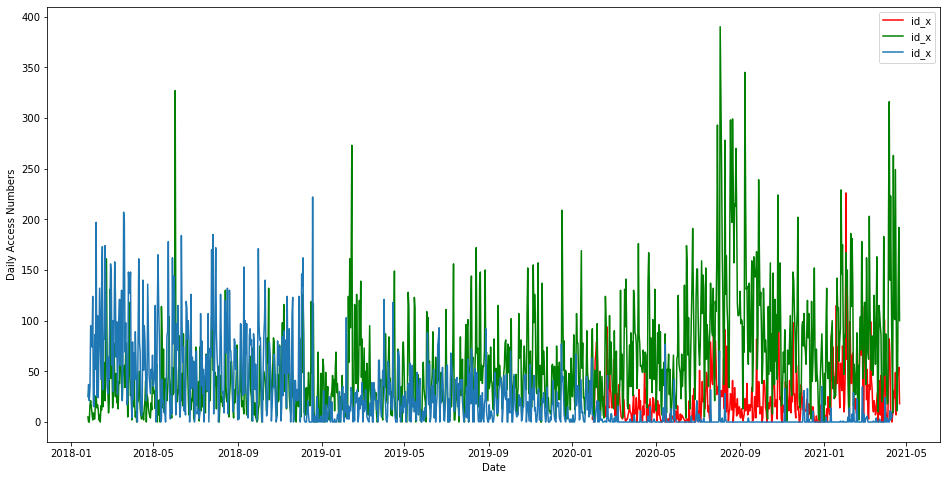

In [228]:
sns.lineplot(data= grad_topics[(grad_topics.program == 'Data Science Program')\
    & (grad_topics.index > grad_topics.end_date)].resample('D').agg({'program':'first','id_x': 'count'}), palette=['red'])

sns.lineplot(data= grad_topics[(grad_topics.program == 'Full-Stack Java Program')\
    & (grad_topics.index > grad_topics.end_date)].resample('D').agg({'program':'first','id_x': 'count'}), palette=['green'])

sns.lineplot(data= grad_topics[(grad_topics.program == 'Full-Stack PHP Program')\
    & (grad_topics.index > grad_topics.end_date)].resample('D').agg({'program':'first','id_x': 'count'}))

plt.xlabel('Date')
plt.ylabel('Daily Access Numbers')
# plt.legend(

plt.show()

In [225]:
grad_topics = grad_topics[grad_topics['page'] != '/']

In [229]:
grad_topics[(grad_topics.program == 'Data Science Program')\
    & (grad_topics.index > grad_topics.end_date)]\
.resample('D')\
.agg({'program':'first','id_x': 'count', 'page':pd.Series.mode})\
.sort_values('id_x', ascending=False).head(20)

,program,id_x,page
date,,,
2021-02-02,Data Science Program,226,"[classification/overview, classification/scale..."
2020-10-27,Data Science Program,132,"[classification/scale_features_or_not.svg, sea..."
2021-02-04,Data Science Program,124,search/search_index.json
2021-01-19,Data Science Program,115,[anomaly-detection/AnomalyDetectionCartoon.jpe...
2021-03-01,Data Science Program,114,"[appendix/postwork, classification/knn, classi..."
2021-02-25,Data Science Program,106,fundamentals/DataToAction_v2.jpg
2021-03-30,Data Science Program,101,appendix/postwork
2021-03-10,Data Science Program,99,"[search/search_index.json, sql/mysql-overview]"
2021-02-08,Data Science Program,99,classification/scale_features_or_not.svg


In [232]:
grad_topics[(grad_topics.program == 'Full-Stack Java Program')\
    & (grad_topics.index > grad_topics.end_date)]\
.resample('D')\
.agg({'program':'first','id_x': 'count', 'page':pd.Series.mode})\
.sort_values('id_x', ascending=False).head(20)

,program,id_x,page
date,,,
2020-08-03,Full-Stack Java Program,390,javascript-ii
2020-09-08,Full-Stack Java Program,345,"[javascript-i, spring]"
2018-06-02,Full-Stack Java Program,327,"[content/javascript/javascript-with-html.html,..."
2020-08-04,Full-Stack Java Program,321,javascript-ii
2021-04-06,Full-Stack Java Program,316,jquery/essential-methods/attributes-and-css
2020-08-21,Full-Stack Java Program,299,spring
2020-08-18,Full-Stack Java Program,298,"[java-ii, javascript-ii]"
2020-07-30,Full-Stack Java Program,293,html-css
2020-08-10,Full-Stack Java Program,278,html-css


In [231]:
grad_topics[(grad_topics.program == 'Full-Stack PHP Program')\
    & (grad_topics.index > grad_topics.end_date)]\
.resample('D')\
.agg({'program':'first','id_x': 'count', 'page':pd.Series.mode})\
.sort_values('id_x', ascending=False).head(20)

,program,id_x,page
date,,,
2018-12-19,Full-Stack PHP Program,222,html-css
2018-03-19,Full-Stack PHP Program,207,mysql/clauses/order-by
2018-03-20,Full-Stack PHP Program,198,mysql/group-by
2018-02-07,Full-Stack PHP Program,197,spring
2018-07-27,Full-Stack PHP Program,185,java-ii
2018-06-11,Full-Stack PHP Program,184,javascript-i/introduction/variables
2018-05-23,Full-Stack PHP Program,178,html-css/elements
2018-02-20,Full-Stack PHP Program,174,slides/alumni-tech-survey-2018
2018-02-16,Full-Stack PHP Program,173,"[content/php_i/intro-via-interactive-shell, co..."


In [233]:
grad_topics[(grad_topics.program == 'Front-End Program')\
    & (grad_topics.index > grad_topics.end_date)]\
.resample('D')\
.agg({'program':'first','id_x': 'count', 'page':pd.Series.mode})\
.sort_values('id_x', ascending=False).head(20)

,program,id_x,page
date,,,
2018-03-22,Front-End Program,4,content/html-css


#  Least after Grad

In [242]:
least_ds = grad_topics[(grad_topics.program == 'Data Science Program')\
    & (grad_topics.index > grad_topics.end_date)]\
.resample('D')\
.agg({'program':'first','id_x': 'count', 'page':pd.Series.mode})\
.sort_values('id_x', ascending=False)

least_ds[least_ds.id_x > 0].tail(20)

,program,id_x,page
date,,,
2020-06-17,Data Science Program,2,"[10-anomaly-detection/1-overview, 3-sql/3-data..."
2021-04-04,Data Science Program,2,"[sql/group-by, sql/mysql-overview]"
2020-05-11,Data Science Program,2,"[9-timeseries/2-acquire, 9-timeseries/3-prep]"
2020-06-12,Data Science Program,2,"[4-python/3-data-types-and-variables, 4-python..."
2020-09-20,Data Science Program,2,"[sql/basic-statements, sql/temporary-tables]"
2020-06-25,Data Science Program,2,"[appendix/cli-git-overview, appendix/ds-enviro..."
2020-06-07,Data Science Program,2,"[11-nlp/3-acquire, search/search_index.json]"
2020-09-05,Data Science Program,1,storytelling/overview
2020-07-03,Data Science Program,1,11-nlp/3-acquire


In [243]:
least_java = grad_topics[(grad_topics.program == 'Full-Stack Java Program')\
    & (grad_topics.index > grad_topics.end_date)]\
.resample('D')\
.agg({'program':'first','id_x': 'count', 'page':pd.Series.mode})\
.sort_values('id_x', ascending=False)

least_java[least_java.id_x > 0].tail(20)

,program,id_x,page
date,,,
2018-03-31,Full-Stack Java Program,2,"[spring, spring/extra-features/form-validation]"
2020-02-01,Full-Stack Java Program,2,"[javascript-ii/map-filter-reduce, search/searc..."
2018-04-17,Full-Stack Java Program,2,"[appendix, appendix/further-reading/spring/see..."
2019-01-12,Full-Stack Java Program,2,"[mysql, mysql/introduction]"
2019-07-14,Full-Stack Java Program,2,"[javascript-i, jquery/whack-a-mole/create-game]"
2019-05-11,Full-Stack Java Program,2,"[java-ii, java-iii/jdbc]"
2018-09-30,Full-Stack Java Program,2,"[appendix, appendix/capstone-workbook]"
2021-02-21,Full-Stack Java Program,2,"[javascript-ii, jquery]"
2019-07-13,Full-Stack Java Program,2,"[html-css, javascript-i]"


In [244]:
least_php = grad_topics[(grad_topics.program == 'Full-Stack PHP Program')\
    & (grad_topics.index > grad_topics.end_date)]\
.resample('D')\
.agg({'program':'first','id_x': 'count', 'page':pd.Series.mode})\
.sort_values('id_x', ascending=False)

least_php[least_php.id_x > 0].tail(20)

,program,id_x,page
date,,,
2021-02-14,Full-Stack PHP Program,1,content/javascript_ii/ajax-api.html
2020-02-23,Full-Stack PHP Program,1,content/php_iii
2018-11-03,Full-Stack PHP Program,1,javascript-i
2019-01-26,Full-Stack PHP Program,1,javascript-ii/map-filter-reduce
2020-02-24,Full-Stack PHP Program,1,content/php_iii/php-with-html
2019-08-17,Full-Stack PHP Program,1,html-css/elements
2021-01-29,Full-Stack PHP Program,1,content/html-css
2021-01-25,Full-Stack PHP Program,1,content/html-css
2018-09-23,Full-Stack PHP Program,1,toc


In [231]:
grad_topics[(grad_topics.program == 'Full-Stack PHP Program')\
    & (grad_topics.index > grad_topics.end_date)]\
.resample('D')\
.agg({'program':'first','id_x': 'count', 'page':pd.Series.mode})\
.sort_values('id_x', ascending=False).head(20)

,program,id_x,page
date,,,
2018-12-19,Full-Stack PHP Program,222,html-css
2018-03-19,Full-Stack PHP Program,207,mysql/clauses/order-by
2018-03-20,Full-Stack PHP Program,198,mysql/group-by
2018-02-07,Full-Stack PHP Program,197,spring
2018-07-27,Full-Stack PHP Program,185,java-ii
2018-06-11,Full-Stack PHP Program,184,javascript-i/introduction/variables
2018-05-23,Full-Stack PHP Program,178,html-css/elements
2018-02-20,Full-Stack PHP Program,174,slides/alumni-tech-survey-2018
2018-02-16,Full-Stack PHP Program,173,"[content/php_i/intro-via-interactive-shell, co..."


In [233]:
grad_topics[(grad_topics.program == 'Front-End Program')\
    & (grad_topics.index > grad_topics.end_date)]\
.resample('D')\
.agg({'program':'first','id_x': 'count', 'page':pd.Series.mode})\
.sort_values('id_x', ascending=False).head(20)

,program,id_x,page
date,,,
2018-03-22,Front-End Program,4,content/html-css


<div class="alert alert-box alert-info">
    </div>
    
***
### 7. Which lessons are least accessed? 

In [192]:
full_students_ts

,page,id_x,cohort,ip,id_y,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id,program
date,,,,,,,,,,,,,,
2018-01-26 09:55:03,/,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0,Full-Stack PHP Program
2018-01-26 09:56:02,java-ii,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0,Full-Stack PHP Program
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0,Full-Stack PHP Program
2018-01-26 09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0,Full-Stack PHP Program
2018-01-26 09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,None,2.0,Full-Stack Java Program
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-21 16:36:09,jquery/personal-site,869,135.0,136.50.98.51,135.0,Marco,#marco,2021-01-25,2021-07-19,2021-01-20 21:31:11,2021-01-20 21:31:11,None,2.0,Full-Stack Java Program
2021-04-21 16:36:34,html-css/css-ii/bootstrap-grid-system,948,138.0,104.48.214.211,138.0,Neptune,#neptune,2021-03-15,2021-09-03,2021-03-15 19:57:09,2021-03-15 19:57:09,None,2.0,Full-Stack Java Program
2021-04-21 16:37:48,java-iii,834,134.0,67.11.50.23,134.0,Luna,#luna,2020-12-07,2021-06-08,2020-12-07 16:58:43,2020-12-07 16:58:43,None,2.0,Full-Stack Java Program


In [201]:
ds_pages = full_students_ts[['page', 'program']][full_students_ts.program == 'Data Science Program'].value_counts()

In [202]:
php_pages = full_students_ts[['page', 'program']][full_students_ts.program == 'Full-Stack PHP Program'].value_counts()

In [203]:
java_pages = full_students_ts[['page', 'program']][full_students_ts.program == 'Full-Stack Java Program'].value_counts()

In [204]:
fe_pages = full_students_ts[['page', 'program']][full_students_ts.program == 'Front-End Program'].value_counts()

In [212]:
ds_pages.head(20)

page                                               program             
/                                                  Data Science Program    8358
search/search_index.json                           Data Science Program    2203
classification/overview                            Data Science Program    1785
1-fundamentals/modern-data-scientist.jpg           Data Science Program    1655
1-fundamentals/AI-ML-DL-timeline.jpg               Data Science Program    1651
1-fundamentals/1.1-intro-to-data-science           Data Science Program    1633
classification/scale_features_or_not.svg           Data Science Program    1590
fundamentals/AI-ML-DL-timeline.jpg                 Data Science Program    1443
fundamentals/modern-data-scientist.jpg             Data Science Program    1438
sql/mysql-overview                                 Data Science Program    1424
fundamentals/intro-to-data-science                 Data Science Program    1413
6-regression/1-overview                         

In [213]:
ds_pages.tail(20)

page                                        program             
appendix/open_data/www.openstreetmap.org    Data Science Program    1
sql.mysql-overview                          Data Science Program    1
sql                                         Data Science Program    1
spring/extra-features/error-pages/asdfasdf  Data Science Program    1
appendix/univariate_regression_in_excel     Data Science Program    1
data-science-modules.jpg                    Data Science Program    1
appendix/www.opensecrets.org                Data Science Program    1
spark-local-mode.svg                        Data Science Program    1
spark-execution-diagram.svg                 Data Science Program    1
b-clustering/project                        Data Science Program    1
bad-charts                                  Data Science Program    1
capstones                                   Data Science Program    1
case-statements                             Data Science Program    1
classification/explore-ol

In [214]:
php_pages.head(20)

page                                                                       program               
/                                                                          Full-Stack PHP Program    1681
index.html                                                                 Full-Stack PHP Program    1011
javascript-i                                                               Full-Stack PHP Program     736
html-css                                                                   Full-Stack PHP Program     542
spring                                                                     Full-Stack PHP Program     501
java-iii                                                                   Full-Stack PHP Program     479
java-ii                                                                    Full-Stack PHP Program     454
java-i                                                                     Full-Stack PHP Program     444
javascript-ii                                         

In [215]:
php_pages.tail(20)

page                                              program               
html-css/media-queries                            Full-Stack PHP Program    1
cohorts/24/capstone-all                           Full-Stack PHP Program    1
Intro_to_Regression                               Full-Stack PHP Program    1
Appendix_Tidy_Data                                Full-Stack PHP Program    1
content/jquery/events/mouse-events.html           Full-Stack PHP Program    1
java-i/loops                                      Full-Stack PHP Program    1
Dataset_Challenge                                 Full-Stack PHP Program    1
Exercises                                         Full-Stack PHP Program    1
content/jquery/events/keyboard-events.html        Full-Stack PHP Program    1
content/appendix/code-standards/html-css.html     Full-Stack PHP Program    1
content/jquery/events/gitbook/images/favicon.ico  Full-Stack PHP Program    1
cohorts/24/grades                                 Full-Stack PHP Prog

In [216]:
java_pages.tail(20)

page                                                       program                
content/jquery/resume-portfolio                            Full-Stack Java Program    1
content/jquery/events/mouse-events.html                    Full-Stack Java Program    1
content/jquery/events/keyboard-events.html                 Full-Stack Java Program    1
content/jquery/essential-methods/traversing.html           Full-Stack Java Program    1
content/jquery/essential-methods/attributes-and-css.html   Full-Stack Java Program    1
content/jquery/essential-methods                           Full-Stack Java Program    1
content/jquery/effects/show-hide-toggle.html               Full-Stack Java Program    1
content/jquery/effects/animate.html                        Full-Stack Java Program    1
content/jquery/effects                                     Full-Stack Java Program    1
content/examples/php/gitbook/images/favicon.ico            Full-Stack Java Program    1
content/examples/html/gitbook/images/

In [217]:
java_pages.head(20)

page                                                                       program                
/                                                                          Full-Stack Java Program    29474
toc                                                                        Full-Stack Java Program    16517
javascript-i                                                               Full-Stack Java Program    15640
search/search_index.json                                                   Full-Stack Java Program    13863
java-iii                                                                   Full-Stack Java Program    11290
html-css                                                                   Full-Stack Java Program    11285
java-ii                                                                    Full-Stack Java Program    10459
spring                                                                     Full-Stack Java Program     9973
jquery                               

In [218]:
fe_pages.head(20)

page                                         program          
content/html-css                             Front-End Program    2
/                                            Front-End Program    1
content/html-css/gitbook/images/favicon.ico  Front-End Program    1
content/html-css/introduction.html           Front-End Program    1
dtype: int64

In [219]:
fe_pages.tail(20)

page                                         program          
content/html-css                             Front-End Program    2
/                                            Front-End Program    1
content/html-css/gitbook/images/favicon.ico  Front-End Program    1
content/html-css/introduction.html           Front-End Program    1
dtype: int64

<div class="alert alert-box alert-info">
    </div>
    
***
### 8. Anything else I should be aware of?

15% of access student access is grads accessing material after their course completed
This means it must be import to students